# Multi-Class Text Classification with Scikit-Learn

Classifying Consumer Finance Complaints into 12 pre-defined classes.

Firstly, import the `pandas` library and view the first 5 components of the dataset.

In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


Import `numpy` for array manipulation

In [0]:
import numpy as np

In this project, we choose only column `Product` and `Consumer complaint narrative`.

In [3]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.head()

,Product,Consumer complaint narrative
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


Remove all the invalid data.

In [4]:
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()

,Product,Consumer complaint narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


Change the heading of the table

In [5]:
df.columns = ['Product', 'Consumer_complaint_narrative']
df.head()

,Product,Consumer_complaint_narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


Add a column encoding the product as an integer

In [6]:
df['Category_id'] = df['Product'].factorize()[0]
df.head()

,Product,Consumer_complaint_narrative,Category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [7]:
category_id_df = df[['Product', 'Category_id']].drop_duplicates().sort_values('Category_id')
print(category_id_df)

                                                 Product  Category_id
1                                       Credit reporting            0
2                                          Consumer Loan            1
12                                       Debt collection            2
25                                              Mortgage            3
36                                           Credit card            4
90                               Other financial service            5
124                              Bank account or service            6
152                                         Student loan            7
168                                      Money transfers            8
538                                          Payday loan            9
985                                         Prepaid card           10
1431   Money transfer, virtual currency, or money ser...           11
1529   Credit reporting, credit repair services, or o...           12
4099                

In [8]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 13,
 'Consumer Loan': 1,
 'Credit card': 4,
 'Credit card or prepaid card': 15,
 'Credit reporting': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 11,
 'Money transfers': 8,
 'Mortgage': 3,
 'Other financial service': 5,
 'Payday loan': 9,
 'Payday loan, title loan, or personal loan': 17,
 'Prepaid card': 10,
 'Student loan': 7,
 'Vehicle loan or lease': 14,
 'Virtual currency': 16}

In [9]:
id_to_category = dict(df[['Category_id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

## Inbalanced Classes

We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Debt collection, Credit reporting and Mortgage.

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(8,6))

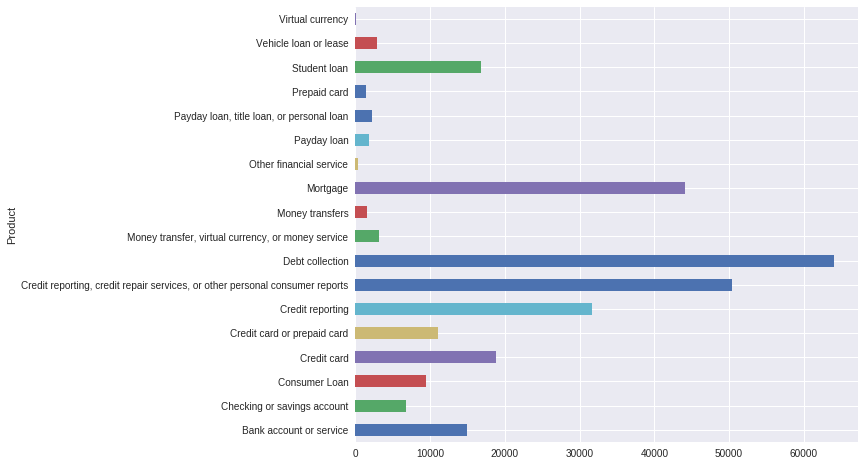

In [11]:
df.groupby('Product').Consumer_complaint_narrative.count().plot.barh(figsize=(9,8), grid=True)

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms.  Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by **undersampling** or **oversampling** each class.

But since in our case, majority of the classes are out of our interest. So we will just leave it as it is.

## Text Representation

The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

A measure called Term Frequency, Inverse Document Frequency, or tf-idf is used. We will use `sklearn.feature_extraction.text.TfidfVectorizer` to calculate tf-idf vector for each of consumer complaint narrative.

- `sublinear_tf` is set to `True` to use logarithmic form for frequency
- `min_df` is the minimum numbers of documents a word must be presented to be kept
- `norm` is set to `12`, to ensure all our feature vectors have a euclidean norm of 1
- `ngram_range` is set to `(1, 2)` to indicate that we want to consider both unigrams and bigrams.
- `stop_words` is set to `"english"` to remove all common pronouns `("a", "the", ...)` to reduce the number of noisy features.

In [0]:
#@title Default title text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative)

In [13]:
labels = df.Category_id
features.shape

(281190, 564953)

We can use `sklearn.feature_selection.chi2` to find the terms that are the most correlated with each of the products:


In [14]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. direct deposit
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. santander consumer
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. verify accounts
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. report underst

Since we have got our features and labels, we can start to train our classifier and make a prediction.

**Naive Bayes Classifier** 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

classifier = MultinomialNB().fit(X_train_tfidf, y_train)


After fitting the data, let's make some prediction

In [18]:
print(classifier.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [19]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,Category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [20]:
print(classifier.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [21]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,Category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


## Model Selection

We are now ready to benchmark the following four models
- Logistic Regression
- (Multinomial) Naive Bayes
- Linear Support Vector Machines
- Random Forest

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


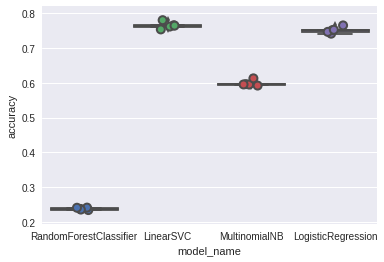

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [23]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.764491
LogisticRegression        0.750749
MultinomialNB             0.598023
RandomForestClassifier    0.238177
Name: accuracy, dtype: float64

## Model Evaluation
For linear SVC, we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

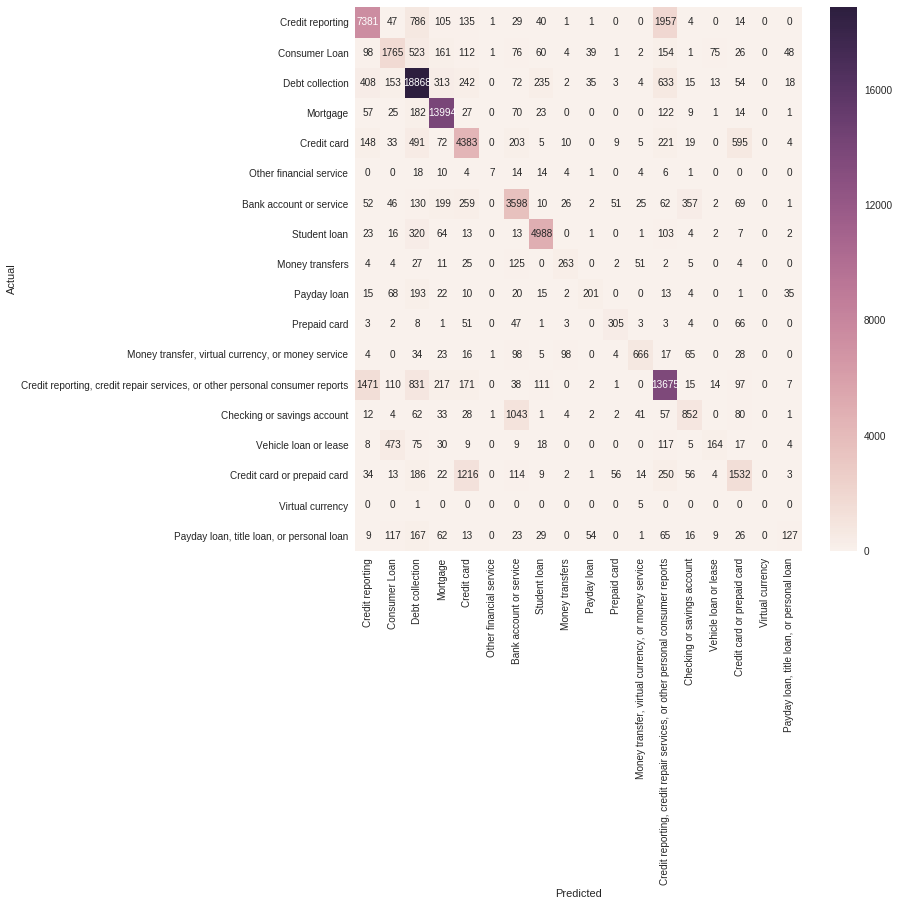

In [24]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [25]:
from IPython.display import display
for predicted in category_id_df.Category_id:
  for actual in category_id_df.Category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Consumer Loan' predicted as 'Credit reporting' : 98 examples.


,Product,Consumer_complaint_narrative
689366,Consumer Loan,XXXX/Motolease is reporting the wrong balance ...
152697,Consumer Loan,Mariner Finance reported my account as closed ...
424288,Consumer Loan,I am writing because on my XXXX and XXXX credi...
151337,Consumer Loan,XXXX I am in Dispute of - THE RESULTS OF YOUR ...
716961,Consumer Loan,"Lexus Financial ServicesXXXX. XXXX XXXX XXXX, ..."
721265,Consumer Loan,SPRINGLEAF AGREED TO REMOVE THEMSELVES FROM MY...
633340,Consumer Loan,I have a creditor on my credit report that is ...
7107,Consumer Loan,"While reviewing my XXXX credit report, I notic..."
229197,Consumer Loan,"Hi, I purchased a XXXX XXXX 2014 in XXXX of sa..."
21638,Consumer Loan,I was offered a refi on my Audi Q5 when stoppi...



'Debt collection' predicted as 'Credit reporting' : 408 examples.


,Product,Consumer_complaint_narrative
185664,Debt collection,I 'm only XXXX and never had an account in my ...
995114,Debt collection,"BACK IN XXXX, ABOUT A YEAR OR SO AFTER I MOVED..."
503355,Debt collection,this account is clearly fraud and needs to be ...
688477,Debt collection,i have XXXX accounts with this company that do...
941086,Debt collection,I XXXX XXXX desire to have a full accounting o...
233301,Debt collection,This account was open in XXXX XX/XX/2008. I ha...
246007,Debt collection,"This company has taken an account, that can no..."
114166,Debt collection,"In XXXX XXXX , I filed for Ch. XXXX ban..."
404210,Debt collection,In 2013 my students loans went into a repaymen...
660942,Debt collection,The OCWEN LOAN SERVICING account XXXX Date of ...



'Mortgage' predicted as 'Credit reporting' : 57 examples.


,Product,Consumer_complaint_narrative
755562,Mortgage,"My husband had retired, right after he retired..."
470902,Mortgage,I need to know what credit scores citi wants b...
390406,Mortgage,My mortgage company refuses to report any of m...
629206,Mortgage,"After finding additional information, I 'd lik..."
210450,Mortgage,I disputed an account with the credit bureaus ...
105390,Mortgage,The original debt and lien was created by XXXX...
398685,Mortgage,made a prepayment plan for XXXX payment to be ...
428756,Mortgage,In 2008 I was awarded a judgement against Wash...
627852,Mortgage,"After the past several years of XXXX, starting..."
475115,Mortgage,Creditor is not accurately reporting a mortgag...



'Credit card' predicted as 'Credit reporting' : 148 examples.


,Product,Consumer_complaint_narrative
791709,Credit card,XXXX sent me an email informing me of a past d...
497579,Credit card,A hard pull on my Equifax credit report from b...
742561,Credit card,"Hi i am XXXX XXXX, i applied for a credit card..."
5496,Credit card,I am unable to log in to the Discover website ...
918671,Credit card,RE : CFPB Case number XXXX Be advised this cas...
201705,Credit card,Equifax and CapitalONE refuse to investigate X...
19984,Credit card,I had filed an FCRA lawsuit with attorney XXXX...
752101,Credit card,I contacted the billing department regarding t...
749248,Credit card,HSBC Bank is reporting XXXX separate delinquen...
332647,Credit card,Chase Bank is reporting an account that does n...



'Bank account or service' predicted as 'Credit reporting' : 52 examples.


,Product,Consumer_complaint_narrative
750268,Bank account or service,Complaint Source : ChexSystems -- a reporting ...
359478,Bank account or service,I had signed up for paypal unaware I was going...
677288,Bank account or service,I got a change of address notification in the ...
530084,Bank account or service,I have inquires in my report about back accoun...
703924,Bank account or service,"Hello, I went into XXXX XXXX XXXX to pen an ac..."
549217,Bank account or service,"Upon reviewing my XXXX credit report, it showe..."
595762,Bank account or service,I applied for a checking account with XXXX and...
132462,Bank account or service,I am unable to access the website XXXX from XX...
302656,Bank account or service,I am submitting a new complaint regarding my o...
630428,Bank account or service,Placed a call to customer service to learn why...



'Student loan' predicted as 'Credit reporting' : 23 examples.


,Product,Consumer_complaint_narrative
743919,Student loan,Sallie Mae is reporting XXXX paid and closed a...
14744,Student loan,Citi bank loan number XXXX for {$6900.00} tran...
64608,Student loan,I have like XXXX accounts showing as negitive ...
105431,Student loan,I am trying to release my ex wife as a cosigno...
311115,Student loan,for 4 yrs straight they garnished my full tax ...
430277,Student loan,"I am currently in the middle of changes, and g..."
941773,Student loan,EDFINANCIAL is hurting my report in which was ...
809064,Student loan,My credit report shows a 90 day late payment f...
550608,Student loan,I have Federal studen loan that was paid in fu...
253163,Student loan,Chase has illegally re-aged debts it is report...



'Payday loan' predicted as 'Credit reporting' : 15 examples.


,Product,Consumer_complaint_narrative
234585,Payday loan,On XXXX/XXXX/15 I noticed an unauthorized depo...
714505,Payday loan,"This payday loan was paid, I have no receipts ..."
620713,Payday loan,I have not applied or received any oaday loans...
329646,Payday loan,Progreso Financiero is Poising my Credit Score...
3998,Payday loan,My identity was stolen in XX/XX/2009. A XXXX X...
40162,Payday loan,I applied for the Personal Loan two times and ...
538216,Payday loan,"On Monday XXXX XXXX, 2016, I received an alert..."
284589,Payday loan,Loan was paid of f in 2011 and Lender has not ...
213994,Payday loan,I was looking at my credit repot and I have ne...
586960,Payday loan,"I received a copies of my XXXX, XXXX, and XXXX..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 1471 examples.


,Product,Consumer_complaint_narrative
833328,"Credit reporting, credit repair services, or o...",Somebody keep going online trying to get credi...
263167,"Credit reporting, credit repair services, or o...",Experian is still reporting my XXXX account as...
954331,"Credit reporting, credit repair services, or o...",I co-signed for an account with my late fiance...
963834,"Credit reporting, credit repair services, or o...",These items reported by XXXX Account Number XX...
816648,"Credit reporting, credit repair services, or o...",I disputed the accuracy of reported bankruptcy...
809568,"Credit reporting, credit repair services, or o...",passed 7 years
966577,"Credit reporting, credit repair services, or o...",Please be advised that I am the victim of iden...
933481,"Credit reporting, credit repair services, or o...",Equifax has reported wrong my credit and I hav...
988738,"Credit reporting, credit repair services, or o...",on XXXX/XXXX/XXXX i submitted my dispute with ...
826728,"Credit reporting, credit repair services, or o...",XXXX county Courthouse refuses to update Equi...



'Checking or savings account' predicted as 'Credit reporting' : 12 examples.


,Product,Consumer_complaint_narrative
957508,Checking or savings account,My Acount make my creit score very low I think...
865981,Checking or savings account,My account Balance on XXXX is Low .. said conn...
1023274,Checking or savings account,I attempted to open a checking account with XX...
964373,Checking or savings account,"XXXX XXXX, XXXX when shopping at a local XXXX ..."
952184,Checking or savings account,I requested my electricity bill be paid by my ...
972712,Checking or savings account,I wrote a letter to FDIC which was forwarded t...
978695,Checking or savings account,I recently learned from XXXX that a address lo...
1003446,Checking or savings account,In XX/XX/XXXX I was involved in an internet sc...
87240,Checking or savings account,I had an overdraft for a {$160.00} and paid it...
1009313,Checking or savings account,Will not allow third party site to access account



'Credit card or prepaid card' predicted as 'Credit reporting' : 34 examples.


,Product,Consumer_complaint_narrative
996348,Credit card or prepaid card,Six accounts were open in a similar to mine. M...
1023617,Credit card or prepaid card,I applied for a credit card and I was told it ...
983024,Credit card or prepaid card,I have a credit card listed on my credit repor...
225061,Credit card or prepaid card,I applied for credit with XXXX. I was told tha...
935532,Credit card or prepaid card,I checked my credit on credit karma and it sai...
1016795,Credit card or prepaid card,This is a rebuttal - see enclosures
998878,Credit card or prepaid card,I paid My Credit in full twice and they report...
990298,Credit card or prepaid card,I did not receive my regular monthly billing s...
950636,Credit card or prepaid card,On XXXX XXXX I received a letter from XXXX XXX...
1016854,Credit card or prepaid card,I agreed to have XXXX take out XXXX a month fo...



'Credit reporting' predicted as 'Consumer Loan' : 47 examples.


,Product,Consumer_complaint_narrative
745694,Credit reporting,i have asked them repeatedly to correct inform...
424169,Credit reporting,In XX/XX/XXXX my immediate family suffered XXX...
379064,Credit reporting,I decided to get a car XXXX and they had sugge...
395274,Credit reporting,The credit bureau did not actually investigate...
509044,Credit reporting,I 've done extended research on how creditors ...
787749,Credit reporting,I RECENTLY CHECKED MY CREDIT AND NOTICED A XXX...
560998,Credit reporting,"I went to Carmax XXXX XXXX XXXX, XXXX, IN XXXX..."
150835,Credit reporting,I purchased and pay off a XX/XX/2008 XXXX XXXX...
325856,Credit reporting,On my credit it says I owe the government XXXX...
400030,Credit reporting,"Good Morning, I have disputed my pay history w..."



'Debt collection' predicted as 'Consumer Loan' : 153 examples.


,Product,Consumer_complaint_narrative
338672,Debt collection,I am am making payments on a weekly basis but ...
999413,Debt collection,Several times Ally Financial has called me to ...
493388,Debt collection,Car totaled! Company did n't pay bank all that...
979126,Debt collection,There is an automobile account that was opened...
438395,Debt collection,JP Morgan Chase Auto repossessed our XXXX Jeep...
1017263,Debt collection,I missed 1 payment of about {$100.00} due to i...
986794,Debt collection,Honda Financial extended an auto lease for a p...
641439,Debt collection,I have a auto loan with Ally. They call me XXX...
885757,Debt collection,"Co signed auto loan, person passed away, car w..."
969034,Debt collection,On XXXX/XXXX/XXXX I went into Conn 's to purch...



'Mortgage' predicted as 'Consumer Loan' : 25 examples.


,Product,Consumer_complaint_narrative
413157,Mortgage,"Penfed XXXX "" XXXX '' refused my online paymen..."
882570,Mortgage,I am one payment behind as a result of my wife...
667334,Mortgage,I just days ago got from XXXX a credit report ...
345641,Mortgage,I am frustrated with this entire financial sys...
937987,Mortgage,"On XXXX XXXX, XXXX, I began to pay extra towar..."
507982,Mortgage,My husband has died and I am filing bankruptcy...
83650,Mortgage,I purchased a home in XX/XX/XXXX with a cash p...
982259,Mortgage,I spoke with XXXX XXXX XXXX XXXX He berated me...
562748,Mortgage,They took over my loan in XX/XX/XXXX and so fa...
545158,Mortgage,"PNC Bank in XXXX, N.C. summited a loan applica..."



'Credit card' predicted as 'Consumer Loan' : 33 examples.


,Product,Consumer_complaint_narrative
740483,Credit card,I am respectfully requesting that Ally Banks p...
553792,Credit card,I purchased a bed for XXXX {$1400.00} from Sle...
620165,Credit card,"On XXXX XXXX, 2015 I submitted a payment reque..."
481957,Credit card,On my report there are XXXX chase auto loan in...
549004,Credit card,Hi! PayPal Credit is engaging in misleading an...
380948,Credit card,So I am applying for a loan and basically was ...
636081,Credit card,I pay my balance in full every month prior to ...
511459,Credit card,This bank has no issue placing hard inquiries ...
322990,Credit card,I tried to refinance my truck through XXXX to ...
389038,Credit card,I had a dispute for XXXX and they will not giv...



'Bank account or service' predicted as 'Consumer Loan' : 46 examples.


,Product,Consumer_complaint_narrative
153,Bank account or service,This complaint is regarding Wells Fargo. XX/XX...
286041,Bank account or service,I had a car loan with XXXX XXXX XXXX and autho...
104350,Bank account or service,I feel like I was discriminated by TD bank in ...
46736,Bank account or service,I applied for Business loan products at NFCU w...
171889,Bank account or service,I applied for a line of credit with BB & T in ...
1032183,Bank account or service,I was a very happy member of Navy Federal Cred...
364245,Bank account or service,HERE IS THE FIRST EMAIL I SENTGood Morning XX/...
79588,Bank account or service,I was distraught to see my car missing as we e...
437175,Bank account or service,I filed a fraud dispute because a company I ma...
922588,Bank account or service,My name is XXXX XXXX. I have account with Ford...



'Student loan' predicted as 'Consumer Loan' : 16 examples.


,Product,Consumer_complaint_narrative
976010,Student loan,Having problems have been charged for a loan t...
76711,Student loan,I recently received an e-mail from Edfinancial...
275122,Student loan,I got a loan in XXXX 2011 from Stafford loan f...
722301,Student loan,I cosigned with my parents on a loan with Well...
234259,Student loan,I have been battling with Wells Fargo for year...
32956,Student loan,I asked for a Goodwill Adjustment and the loan...
311756,Student loan,My stepson used my ss # to obtain XXXX differe...
976224,Student loan,I was shocked when I reviewed my credit report...
225464,Student loan,Well Fargo input my loan as a $ XXXX/month pay...
611811,Student loan,"Mohela called me on XXXX/XXXX/15, I told the r..."



'Payday loan' predicted as 'Consumer Loan' : 68 examples.


,Product,Consumer_complaint_narrative
268492,Payday loan,I XXXX XXXX took a loan out with cash express ...
341004,Payday loan,On XXXX/XXXX/15 I recieved a loan from Radient...
323490,Payday loan,I applied for a loan with ACE Loans. After sub...
574381,Payday loan,I was approached by a company called big pictu...
346192,Payday loan,The purpose of this complaint is based on a re...
602213,Payday loan,I am a XXXX person who has XXXX XXXX and unabl...
33601,Payday loan,"I borrowed XXXX in 2012, I have already paid b..."
533258,Payday loan,"I applied for a loan for on XXXX XXXX, 2015 fo..."
470950,Payday loan,I borrowed a loan {$600.00} with the understan...
391097,Payday loan,"applied for loan with P N C financial, they re..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 110 examples.


,Product,Consumer_complaint_narrative
927932,"Credit reporting, credit repair services, or o...",I am trying to get a job at XXXX and they rece...
992512,"Credit reporting, credit repair services, or o...",I keep getting calls from various credit card ...
882114,"Credit reporting, credit repair services, or o...",I was involved in an accident in the vehicle o...
859322,"Credit reporting, credit repair services, or o...",They pulled my credit score twice without my p...
1003268,"Credit reporting, credit repair services, or o...",on XX/XX/XXXX I was involved in a car accident...
602018,"Credit reporting, credit repair services, or o...",Santander charged off this account back in 201...
948344,"Credit reporting, credit repair services, or o...",I got a car with a loan from GoFinancial in 20...
985918,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX and I am currently servin...
937782,"Credit reporting, credit repair services, or o...",I XXXX XXXX believes that American Honda Finan...
825165,"Credit reporting, credit repair services, or o...",Nissan Motors Acceptance Company ( NMAC ) Loan...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 473 examples.


,Product,Consumer_complaint_narrative
922479,Vehicle loan or lease,I took out a loan with Prestige Financial year...
877450,Vehicle loan or lease,I received a Chase Auto Loan for a new car in ...
1003774,Vehicle loan or lease,A payment for XXXX that the Westlake Financial...
891917,Vehicle loan or lease,To whom it may concern : I purchased a brand n...
816202,Vehicle loan or lease,Leased a XXXX XXXX XXXX from a local d...
266896,Vehicle loan or lease,I went to Wells Fargo t o refinance my car lo...
851022,Vehicle loan or lease,"I purchased a car from Santander, I had to mov..."
867399,Vehicle loan or lease,In the beginning of the year i took out 2 auto...
831166,Vehicle loan or lease,"Three months ago, I contacted Bank of America ..."
831241,Vehicle loan or lease,I purchased a used XXXX XXXX XXXX XX...



'Credit card or prepaid card' predicted as 'Consumer Loan' : 13 examples.


,Product,Consumer_complaint_narrative
1006957,Credit card or prepaid card,XXXX provided a credit card service through XX...
273034,Credit card or prepaid card,I had called Citibank to cancel the Payment Sa...
1006197,Credit card or prepaid card,I was shocked when I reviewed my credit report...
1006262,Credit card or prepaid card,I was shocked when I reviewed my credit report...
965653,Credit card or prepaid card,"XXXX XXXX, XXXX XXXX XXXX Home Depot Credit Se..."
269538,Credit card or prepaid card,In XXXX XXXX we purchased furniture from A...
880698,Credit card or prepaid card,I scheduled a move with XXXX XXXX XXXX XXXX/XX...
915750,Credit card or prepaid card,I called Wells Fargo today to make a payment w...
993305,Credit card or prepaid card,"Hello, I am contacting you as a last ditch eff..."
102164,Credit card or prepaid card,I paid for a used XXXX XXXX XXXX and...



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 117 examples.


,Product,Consumer_complaint_narrative
849898,"Payday loan, title loan, or personal loan",I called XXXX XXXX XXXX ( XXXX ) b...
961671,"Payday loan, title loan, or personal loan","XX/XX/XXXX, 2017. I had received several phone..."
260708,"Payday loan, title loan, or personal loan",I had an installment loan wit h Conn 's that I...
892725,"Payday loan, title loan, or personal loan",I applied for a lending club loan on XXXX XXXX...
49948,"Payday loan, title loan, or personal loan",Im self employed and I got a large personal lo...
876442,"Payday loan, title loan, or personal loan","XX/XX/XXXX : Had received several "" Pre-Approv..."
994183,"Payday loan, title loan, or personal loan",XXXX XXXX went to this loan place XXXX XXXX at...
280948,"Payday loan, title loan, or personal loan",I was approved online for a loan through OneM...
813326,"Payday loan, title loan, or personal loan",I applied for a home improvement loan over the...
949221,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, I attempted to buy a new car fr..."



'Credit reporting' predicted as 'Debt collection' : 786 examples.


,Product,Consumer_complaint_narrative
606993,Credit reporting,My information was stolen in the certegy incid...
343862,Credit reporting,There is a report of collection for {$100.00}....
919981,Credit reporting,XXXX XXXX XXXX XXXX continues to report a bala...
145826,Credit reporting,This Fraud address was asked to be removed and...
410590,Credit reporting,I have sent requests to TransUnion to stop fal...
330821,Credit reporting,I have attached proof that i have requested th...
495447,Credit reporting,"On XXXX XXXX, 2015 I discovered that a company..."
216110,Credit reporting,I have an account on my credit report that doe...
736657,Credit reporting,This debt is from services at XXXX Hospital XX...
618759,Credit reporting,Need updated payment history prior to filing b...



'Consumer Loan' predicted as 'Debt collection' : 523 examples.


,Product,Consumer_complaint_narrative
244663,Consumer Loan,I surrendered my vehicle in a bankruptcy that ...
256127,Consumer Loan,In late XXXX One Main Financial added ad accou...
787800,Consumer Loan,I returned the car back to CNAC and I am sure ...
742352,Consumer Loan,I woke up to a collection call from Ally finan...
478881,Consumer Loan,I started having my wages garnished by a law f...
735741,Consumer Loan,Emoney Usa wont work with my credit counseling...
113733,Consumer Loan,On XXXX .17 I ag reed to a purchase in the t...
299517,Consumer Loan,I have been with this company since XXXX of 20...
885152,Consumer Loan,Creditor : Danco Financial ( XXXX ) Law Office...
363791,Consumer Loan,I have XXXX cases with you on the same conflic...



'Mortgage' predicted as 'Debt collection' : 182 examples.


,Product,Consumer_complaint_narrative
330123,Mortgage,Wells Fargo continues to conceal from the Cons...
516104,Mortgage,"Lost jobs unable to pay, gave us small payment..."
349562,Mortgage,I am submitting a compliant. I have been at my...
975197,Mortgage,"Questions to the pretender lenders, their agen..."
79938,Mortgage,We borrowed {$32000.00} twenty years ago from ...
937756,Mortgage,Keep submitting documents and agents keep bein...
28601,Mortgage,My loan is through PennyMac. I pay it at the e...
462195,Mortgage,Debtor is inaccurately reporing a debt to the ...
930932,Mortgage,"In XXXX of XXXX, I signed a retainer and have ..."
325902,Mortgage,Vhda lawyers and bankruptcy attorney bullied m...



'Credit card' predicted as 'Debt collection' : 491 examples.


,Product,Consumer_complaint_narrative
682326,Credit card,Synchrony bank/Walmart is reporting XXXX diffe...
661671,Credit card,Bank of America/ MBNA did not follow through r...
697473,Credit card,MILITARYSTAR ACCOUNT NUMBERs : XXXX XX/XX/XXXX...
74491,Credit card,I submitted and FDCPA debt validation request ...
132198,Credit card,XXXX Consumer Services continually calls me ab...
76641,Credit card,I have asked Macys department store to stop ca...
500233,Credit card,I sent PNC Bank a debt validation letter on XX...
430914,Credit card,The cardholder XXXX XXXX passed away on XXXX/X...
398324,Credit card,I do not recognize this bankcard? This account...
333935,Credit card,I did not get anything other than the logo tha...



'Other financial service' predicted as 'Debt collection' : 18 examples.


,Product,Consumer_complaint_narrative
633641,Other financial service,My husband and I needed credit consultation an...
524155,Other financial service,I purchased a WU Money Order for {$75.00} to m...
567455,Other financial service,I paid Global Client Solutions to help me with...
745786,Other financial service,we signed up with Global Client Solutions to c...
533931,Other financial service,As of XXXX XXXX I had repaid my debt with an e...
157624,Other financial service,I attempted to exchange euros to dollars at th...
558766,Other financial service,I contacted the Law Office of Michael Lupolove...
747133,Other financial service,Nicholes Financial Inc is reporting a Charged ...
147595,Other financial service,My insurance company have issued check for car...
437058,Other financial service,Previous [ Case number : XXXX ] XXXX XXXX lied...



'Bank account or service' predicted as 'Debt collection' : 130 examples.


,Product,Consumer_complaint_narrative
40373,Bank account or service,"XXXX XXXX of Susquehanna Bancshares XXXX XXXX,..."
682634,Bank account or service,"I have sent numerous letters, police reports a..."
337088,Bank account or service,"RE Case number XXXX On XX/XX/2016, I hired XXX..."
920336,Bank account or service,This matter has to do with PayPal. I have sold...
393689,Bank account or service,My banking records were subpoenaed from Bank o...
249055,Bank account or service,I had an account for an IRA with a company. Th...
388753,Bank account or service,This account has been paid in full and should ...
544399,Bank account or service,Wellsfargo refuses to discharge it 's debt to ...
784187,Bank account or service,I saw that there was a fee charged to my bank ...
787636,Bank account or service,"PayPal Attention : Legal Department XXXX XXXX,..."



'Student loan' predicted as 'Debt collection' : 320 examples.


,Product,Consumer_complaint_narrative
476346,Student loan,Callings all-day long. Customer service is rud...
656052,Student loan,Wells Fargo continuously calls my mother 's wo...
282029,Student loan,Have received letter announcing garnishment to...
522239,Student loan,Been in a battle for years for a student lostu...
372462,Student loan,They keep increasing my payment and will not w...
52828,Student loan,I recently received a letter from Financial As...
906381,Student loan,"InXX/XX/XXXX, I was deemed XXXX XXXX after dea..."
8778,Student loan,I was told that it could be wiped off and cons...
794728,Student loan,They have been calling me with robo calls 6-8 ...
577686,Student loan,I am in a repayment program with the XXXX. I h...



'Money transfers' predicted as 'Debt collection' : 27 examples.


,Product,Consumer_complaint_narrative
684506,Money transfers,I was told by a person claiming to be XXXX XXX...
14459,Money transfers,This is a summary and a full version will be a...
206298,Money transfers,Addendum to CFPB Case # XXXX : A Fraudster use...
605996,Money transfers,PayPal CreditThe email message received by me ...
236636,Money transfers,"Used a phone at a CVS on XXXX and XXXX XXXX, X..."
24917,Money transfers,I had made a payment to my credit card account...
299165,Money transfers,I tried to track and change a pass code or tes...
759835,Money transfers,My son XXXX XXXX is trying to secure a place t...
74337,Money transfers,"Sir, On XX/XX/XXXX I Have sent XXXX $ to XXXX ..."
98514,Money transfers,XXXX XXXX XXXX XXXX has failed to provide docu...



'Payday loan' predicted as 'Debt collection' : 193 examples.


,Product,Consumer_complaint_narrative
393402,Payday loan,The creditor stated there would be no further ...
124476,Payday loan,Ace Check Cashing is constantly calling me at ...
254261,Payday loan,Received notice from XXXX managment and paid {...
792114,Payday loan,I took out a XXXX advance in 2009 to advance a...
111042,Payday loan,I have informed Canyon Finance to not contact ...
345526,Payday loan,XXXX XXXX from XXXX XXXX XXXX contacted me fro...
369621,Payday loan,"I was called by XXXX XXXX XXXX, who had my ent..."
146814,Payday loan,I have paid for a pay day loan XXXX and now am...
792719,Payday loan,My problem is the payday lender is harassing m...
344152,Payday loan,"According to XXXX Management, I am in a collec..."



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 34 examples.


,Product,Consumer_complaint_narrative
925598,"Money transfer, virtual currency, or money ser...","Respected sir, I am a USA citizen and presentl..."
840653,"Money transfer, virtual currency, or money ser...",I offered a delivery service using my truck to...
105091,"Money transfer, virtual currency, or money ser...","I made a bill pay at XXXX in XXXX using "" ..."
845278,"Money transfer, virtual currency, or money ser...",I have a complaint about someone selling my id...
989782,"Money transfer, virtual currency, or money ser...",I have received by mail a document which seems...
947102,"Money transfer, virtual currency, or money ser...",In USA the legal transfer fees commission is {...
953122,"Money transfer, virtual currency, or money ser...",I was contacted by a third party company promi...
1025531,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX XXXX XXXX XXXXXXXX XXXX CA XXXX...
271101,"Money transfer, virtual currency, or money ser...",They have refused my service and they really h...
983204,"Money transfer, virtual currency, or money ser...",yes i lost over internet scam inhertance fraud...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 831 examples.


,Product,Consumer_complaint_narrative
892207,"Credit reporting, credit repair services, or o...",This has been on my credit for 5 years and to ...
896969,"Credit reporting, credit repair services, or o...",i have went through the BBB to get through thi...
805135,"Credit reporting, credit repair services, or o...",I had an account with XXXX that was paid and I...
969791,"Credit reporting, credit repair services, or o...","XXXX This number "" XXXX XXXX '' Calls Every da..."
933741,"Credit reporting, credit repair services, or o...",This is regarding an adverse account item logg...
827753,"Credit reporting, credit repair services, or o...",I previously had a relationship with XXXX an...
863156,"Credit reporting, credit repair services, or o...",reporting XXXX more than what is owed
915738,"Credit reporting, credit repair services, or o...",IC Systems reports that I owe XXXX {$100.00} a...
914249,"Credit reporting, credit repair services, or o...","Hello, I have a paid collection with ECMC for ..."
830362,"Credit reporting, credit repair services, or o...",I received an alert on my credit report from M...



'Checking or savings account' predicted as 'Debt collection' : 62 examples.


,Product,Consumer_complaint_narrative
972421,Checking or savings account,I 've discovered these charges I 've been bill...
284890,Checking or savings account,XXXX XXXX XXXX & XXXX XXXX XXXX XXXX XXXX XXXX...
984584,Checking or savings account,"XXXX XXXX, 2017 amount {$1900.00} I was basely..."
997646,Checking or savings account,ear Sirs/Madams On the XXXX of this present mo...
806693,Checking or savings account,Money Was Taken Out my account and i wish it w...
845958,Checking or savings account,I created an account with XXXX XXXX and ...
951071,Checking or savings account,On XX/XX/XXXX I was charged a monthly maintain...
954640,Checking or savings account,XXXX XXXX Reference File # XXXX XXXX XXXX TRAN...
256917,Checking or savings account,I recently filed a complaint. My complaint # i...
1018474,Checking or savings account,PNC BANK ALLOW IDENTIFY DEBT TO HAPPEN I LOST ...



'Vehicle loan or lease' predicted as 'Debt collection' : 75 examples.


,Product,Consumer_complaint_narrative
1026826,Vehicle loan or lease,I went in XX/XX/XXXX and after being in a chap...
949597,Vehicle loan or lease,"On XXXX XXXX XXXX, i did a pay off online for ..."
82693,Vehicle loan or lease,I am being charged more for interest than I ag...
958023,Vehicle loan or lease,BANK OF AMERICA XXXX XXXX XXXX XXXX XXXX XXXX ...
912418,Vehicle loan or lease,I obtained a copy of my credit file around XXX...
927785,Vehicle loan or lease,"On XXXX XXXX, 2017, I sent a certified letter ..."
882884,Vehicle loan or lease,This pertains to the complaint # that XXXX was...
986857,Vehicle loan or lease,I advised the company that I believe that I wa...
925695,Vehicle loan or lease,I bought a XXXX XXXX XXXX from XXXX XXXX in XX...
924836,Vehicle loan or lease,Cosigned a loan car was reposted primary perso...



'Credit card or prepaid card' predicted as 'Debt collection' : 186 examples.


,Product,Consumer_complaint_narrative
891690,Credit card or prepaid card,I recently filed a chapter XXXX Bankruptcy on ...
824837,Credit card or prepaid card,I generated credit report by XXXX on XX/XX/XXX...
991042,Credit card or prepaid card,"Dear CFPB, Every week and sometimes two times ..."
989441,Credit card or prepaid card,I have previously filed complaint and they did...
269898,Credit card or prepaid card,I received a letter from you about me enrollin...
848922,Credit card or prepaid card,I was contacted by planning folders to place a...
1009387,Credit card or prepaid card,I sent the following letter over a month ago a...
883153,Credit card or prepaid card,COMENITYCAPITAL/XXXX this was opened in XX/XX/...
1010877,Credit card or prepaid card,I have tried connecting my account to my XXXX ...
948047,Credit card or prepaid card,Again this nightmare with Citigroup!!! A year ...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 167 examples.


,Product,Consumer_complaint_narrative
904738,"Payday loan, title loan, or personal loan","Suntrust, XXXX XXXX XXXX, XXXX, VA XXXX {$330...."
959535,"Payday loan, title loan, or personal loan",in XXXX XXXX on XXXX or XXXX money was taken f...
959331,"Payday loan, title loan, or personal loan",th I have filed another complaint againt this ...
282853,"Payday loan, title loan, or personal loan",I believe this company to be shandy and as sca...
875911,"Payday loan, title loan, or personal loan",I received a check in the mail for XXXX dollar...
927840,"Payday loan, title loan, or personal loan","The company First Heritage Company, garnished ..."
949202,"Payday loan, title loan, or personal loan",XXXX/XXXX/XXXX {$400.00} I called numerous tim...
801699,"Payday loan, title loan, or personal loan",on XXXX I RECEIVED A CALL FROM XXXX AT XX...
1001131,"Payday loan, title loan, or personal loan",In the beginning of XX/XX/XXXX I started to mo...
801665,"Payday loan, title loan, or personal loan",We have had to file a hardship due to circumst...



'Credit reporting' predicted as 'Mortgage' : 105 examples.


,Product,Consumer_complaint_narrative
93469,Credit reporting,In XXXX XXXX we approached our mortgage lender...
590509,Credit reporting,I will like to have the inquiry removed from m...
645292,Credit reporting,I pulled my credit annual report and found fal...
381831,Credit reporting,Today I was in contact with PennyMac Loan comp...
614460,Credit reporting,This was a tax lien that was filed for propert...
425172,Credit reporting,I have applied for a mortgage refinance. My cr...
153773,Credit reporting,This issue is with XXXX XXXX. They have failed...
735106,Credit reporting,My wife and I filed for bankruptcy under chapt...
190913,Credit reporting,There is an item I have disputed several times...
274109,Credit reporting,I stop paying my mortgage so that i can become...



'Consumer Loan' predicted as 'Mortgage' : 161 examples.


,Product,Consumer_complaint_narrative
628053,Consumer Loan,I was told by a loan officer the amount I was ...
360163,Consumer Loan,"i took out this loan, been making pymts on it...."
360946,Consumer Loan,I intended to buy a home with a mortgage in 20...
735756,Consumer Loan,XXXX 2015..charged {$15.00} late fee..not late...
709096,Consumer Loan,In XXXX of 2014 our automatic payment to Capit...
47434,Consumer Loan,"Secured a LOAN, was given a bank check issued ..."
426258,Consumer Loan,At the beginning of my loan I made each paymen...
707723,Consumer Loan,Again have n't answered my question.. \nAre yo...
473069,Consumer Loan,This is my third time contacting the CFPB abou...
183225,Consumer Loan,Chase is reporting inaccurate late payments on...



'Debt collection' predicted as 'Mortgage' : 313 examples.


,Product,Consumer_complaint_narrative
982992,Debt collection,"XXXX XXXX XXXX, XXXX as Trustee for Option One..."
873328,Debt collection,X/XX/17 The Honorable Consumer Financial Prote...
271940,Debt collection,In XXXX a Debt collector was take the money ...
93610,Debt collection,"Wo n't return my escrow, even though I 've ask..."
71047,Debt collection,"Beginning in XX/XX/XXXX, we could no longer ma..."
856242,Debt collection,I entered into a HELOC with the XXXX XXXX in X...
762116,Debt collection,Amerifirst finance bought out the loan we used...
142650,Debt collection,I obtained a Line of Credit second mortgage lo...
542302,Debt collection,My name is XXXX XXXX. I am trying to get a rec...
269689,Debt collection,loan XXXX serviced by Ocwen many attempts to...



'Credit card' predicted as 'Mortgage' : 72 examples.


,Product,Consumer_complaint_narrative
561609,Credit card,Citibank would not grant approval for loan via...
43935,Credit card,On XXXX XXXX 2016 I again received marketing e...
405224,Credit card,I have had an ongoing issue with Chase pertain...
74951,Credit card,In XX/XX/XXXX I opened a HELOC with Citizens B...
54460,Credit card,"Chase card services, like most financial provi..."
128391,Credit card,I completed a debt consolidation loan and had ...
340293,Credit card,THE COMPANY SHOWED A 30 DAY LATE IN XX/XX/XXXX...
548083,Credit card,We are in the process of selling our house and...
711904,Credit card,Wells Fargo continues to charge me late fees w...
431025,Credit card,I had a secure card with Wells Fargo where I h...



'Other financial service' predicted as 'Mortgage' : 10 examples.


,Product,Consumer_complaint_narrative
672821,Other financial service,I had a contractor who fraudulently endorsed a...
18434,Other financial service,"After purchasing our second home, we were soli..."
341959,Other financial service,We have been customers of Nationwide Biweekly ...
358737,Other financial service,We had a major flood. Insurance check made pay...
494044,Other financial service,My wife XXXX and I sold our house in XXXX ( NH...
384810,Other financial service,hired foreclosure defense group charged me a s...
122939,Other financial service,In XXXX of 2016 I went under contract for a ne...
547579,Other financial service,I signed up with Nationwide Biweekly Administr...
144444,Other financial service,"wells fargo bank mortgages, forced home owners..."
608598,Other financial service,I hired Shoreview Financial XX/XX/2014 to modi...



'Bank account or service' predicted as 'Mortgage' : 199 examples.


,Product,Consumer_complaint_narrative
236333,Bank account or service,I 've been trying to get a modification since ...
91235,Bank account or service,XXXX XXXX XXXX sold my loan mid-modification t...
392092,Bank account or service,"After a real estate sale XX/XX/XXXX, I deposit..."
692893,Bank account or service,Wells Fargo wo n't honor a line of credit that...
375804,Bank account or service,On XXXX XXXX 2007 I applied for a personal loa...
314699,Bank account or service,Your Home Page is emblazoned with WE 'RE ON YO...
77876,Bank account or service,We originated a mortgage with Citizens One Hom...
530927,Bank account or service,I originally submitted complaint : XXXX - the ...
704379,Bank account or service,I have bee writing the consumer complaint depa...
485431,Bank account or service,"In XX/XX/2013, my ex-wife asked Capital One to..."



'Student loan' predicted as 'Mortgage' : 64 examples.


,Product,Consumer_complaint_narrative
487934,Student loan,"I was a guarantor on a loan for my Kids, and I..."
246411,Student loan,Wells Fargo failed to resolve ny prior complai...
939438,Student loan,In my previous complaints ( XXXX ) to CFPB the...
968549,Student loan,Have a loan that is from an institute from a d...
325352,Student loan,was getting mortgage to buy a home. loan from ...
41581,Student loan,I feel that I have been making monthly payment...
959251,Student loan,I co-signed my daughters loan for $ XXXX I hav...
20606,Student loan,I applied for IBR twice in 2016 because I 'm n...
716608,Student loan,I was told incorrect information about my loan...
975568,Student loan,On XX/XX/XXXX I submitted a request through We...



'Money transfers' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
569899,Money transfers,Issued a wire transfer recall. The receiving b...
86220,Money transfers,"I was contacted by XXXX, XXXX XXXX, and asked ..."
642667,Money transfers,It all started with buying a condo. It 's my f...
624984,Money transfers,"Per my conversation with CFPB on XXXX/XXXX/15,..."
174085,Money transfers,hello i am in the process of registering a com...
719224,Money transfers,I recieved a call stating that I had won XXXX ...
597481,Money transfers,I wired Wells Fargo a large sum of money to at...
750512,Money transfers,"On XXXX XXXX 2016, I had {$86000.00} stolen fr..."
118418,Money transfers,I am a single mother of XXXX and of a military...
465010,Money transfers,I had a home security monitoring service from ...



'Payday loan' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
752913,Payday loan,Lender is not updating my loan status in the V...
26073,Payday loan,This where I draw the line these folks knew I ...
67695,Payday loan,I apply for a Loan with no interest for XXXX m...
464880,Payday loan,The wording surrounding the terms of the loan ...
511942,Payday loan,Lender WLCC XXXX/DBA Arrowhead Advance is char...
770520,Payday loan,I took out an online loan in the amount of {$3...
368902,Payday loan,I think these loan should be illegal due to fa...
285261,Payday loan,the lender removed money from a bank account i...
719582,Payday loan,I feel am being over charged. I had made payme...
44855,Payday loan,"The lender, or the lender 's collection, keeps..."



'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 23 examples.


,Product,Consumer_complaint_narrative
800862,"Money transfer, virtual currency, or money ser...",Bank of America had not sent my updated bank i...
282793,"Money transfer, virtual currency, or money ser...","For more than 200 years, Chase has been one of..."
953928,"Money transfer, virtual currency, or money ser...",I have a brokerage account with XXXX XXXX. The...
889859,"Money transfer, virtual currency, or money ser...",MB financial is not updating my information wi...
928683,"Money transfer, virtual currency, or money ser...",I was promised a mortgage loan from XXXX XXXX ...
283405,"Money transfer, virtual currency, or money ser...",I rejected the response fro m Wells Fargo on ...
270120,"Money transfer, virtual currency, or money ser...",I XXXX from XXXX XXXX XXXX where I...
960828,"Money transfer, virtual currency, or money ser...","On XXXX XXXX, XXXX I entered a complaint throu..."
1018582,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX our area was hit by Hurricane XX...
850923,"Money transfer, virtual currency, or money ser...","This is not a debt collection issue, I chose t..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 217 examples.


,Product,Consumer_complaint_narrative
964690,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I requested an investigati..."
982057,"Credit reporting, credit repair services, or o...",I refinance my house with XXXX XXXX they paid ...
935515,"Credit reporting, credit repair services, or o...",Wells fargo check my credit with out my permis...
952454,"Credit reporting, credit repair services, or o...","It 's XXXX am in the morning, guest what I 'm ..."
861390,"Credit reporting, credit repair services, or o...",Bay view loans continues to report that I have...
845652,"Credit reporting, credit repair services, or o...",Since XXXX of XXXX I was on a repayment plan w...
888366,"Credit reporting, credit repair services, or o...","On XX/XX/XXXX, I applied for a home loan to pu..."
801142,"Credit reporting, credit repair services, or o...","Despite several request, to send a written sta..."
915809,"Credit reporting, credit repair services, or o...",I was going over my credit report and saw that...
840867,"Credit reporting, credit repair services, or o...",I entered into a trial modification agreement ...



'Checking or savings account' predicted as 'Mortgage' : 33 examples.


,Product,Consumer_complaint_narrative
977106,Checking or savings account,"Between XX/XX/XXXX-XX/XX/XXXX, I had 2 cds tot..."
984371,Checking or savings account,This complaint would be a follo0w up to two pr...
813732,Checking or savings account,Account : XXXX Owner : XXXX XXXX XXXX XXXX XXX...
1025157,Checking or savings account,XXXX XXXX XXXX Bank of America XXXX XXXX XXXX ...
924931,Checking or savings account,US Bank issued me an escrow overage refund che...
847614,Checking or savings account,Chase takes a very long time to send over tran...
923201,Checking or savings account,I paid off an old mortgage with Wells Fargo on...
946036,Checking or savings account,THIS BANK HAS {$1000.00} OF MY FUNDS AND WO N'...
863608,Checking or savings account,We are the XXXX XXXX for a XXXX XXXX. On Tuesd...
990535,Checking or savings account,I WAS TOLD THAT BECAUSE I AM A XXXX / XXXX PER...



'Vehicle loan or lease' predicted as 'Mortgage' : 30 examples.


,Product,Consumer_complaint_narrative
924183,Vehicle loan or lease,"My account has been sold to a company, I did n..."
272718,Vehicle loan or lease,XXXX XXXX /2017 Handed a teller at Wellsfa...
975498,Vehicle loan or lease,On XX/XX/XXXX I called and when the call went ...
974655,Vehicle loan or lease,"Hello, Yes, I took out a loan with HSBC back i..."
882131,Vehicle loan or lease,A loan that I have for XXXX XXXX was transferr...
915050,Vehicle loan or lease,My lease is through US Bank and my complaint p...
975928,Vehicle loan or lease,"This month, on XX/XX/XXXX, my loan payment of ..."
852799,Vehicle loan or lease,I submitted a compliant through the CFPB to Na...
861976,Vehicle loan or lease,XX/XX/2017 I attempted to payoff my loan. Late...
876497,Vehicle loan or lease,I received an auto loan from Chase in the amou...



'Credit card or prepaid card' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
841941,Credit card or prepaid card,On XXXX I revived a letter from c apital one...
874479,Credit card or prepaid card,"Of note, my name is XXXX XXXX with Bank of Ame..."
977671,Credit card or prepaid card,This is a personal Loan through Wells Fargo. M...
1024786,Credit card or prepaid card,I mailed a payment to Citi on XX/XX/XXXX for {...
971650,Credit card or prepaid card,I have always make my payments on time ... I h...
959185,Credit card or prepaid card,I have filed the complaint twice and keep gett...
804302,Credit card or prepaid card,"On XX/XX/2018, opening my email I discovered a..."
125530,Credit card or prepaid card,"At Wells Fargo , I continually set up autopay..."
998102,Credit card or prepaid card,This complaint deals specifically with false a...
933744,Credit card or prepaid card,"on XXXX XXXX, XXXX I went on line as I do ever..."



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 62 examples.


,Product,Consumer_complaint_narrative
960129,"Payday loan, title loan, or personal loan",In XXXX of XXXX we called our mortgage company...
946967,"Payday loan, title loan, or personal loan",I have had a personal loan for several years. ...
271253,"Payday loan, title loan, or personal loan",I had a loan with NetCredit which was paid off...
277606,"Payday loan, title loan, or personal loan",On XXXX XXXX XXXX I mailed a certified...
974216,"Payday loan, title loan, or personal loan",I applied and was approved for a XXXX line of ...
813630,"Payday loan, title loan, or personal loan","I do n't believe my "" customery fee '' was fai..."
996961,"Payday loan, title loan, or personal loan",Due to the XXXX of my father I had to take a c...
832314,"Payday loan, title loan, or personal loan",When our draw expired for our line of credit a...
869161,"Payday loan, title loan, or personal loan",I had a loan with world financial pay on time ...
1010423,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX is my lender for solar panels i...



'Credit reporting' predicted as 'Credit card' : 135 examples.


,Product,Consumer_complaint_narrative
215598,Credit reporting,XXXX I contacted XXXX regarding my credit card...
184316,Credit reporting,My wife has a XXXX XXXX XXXX sky miles credit ...
154459,Credit reporting,MY CREDIT SCORE DROP. AND I HAVE NOT APPLIED O...
335799,Credit reporting,I have disputed this with the Credit Reporting...
77374,Credit reporting,I addressed fraudulent activity on my account ...
350857,Credit reporting,"On XXXX XXXX, XXXX, I made arrangements with t..."
161553,Credit reporting,I paid my XXXX bill and I was never 30 days la...
574408,Credit reporting,I am current on my credit cards and paying pay...
202750,Credit reporting,There is a XXXX XXXX credit card on my credit ...
22691,Credit reporting,XXXX was used online fraudulently. I notified ...



'Consumer Loan' predicted as 'Credit card' : 112 examples.


,Product,Consumer_complaint_narrative
415259,Consumer Loan,In XXXX 2016 I applied for a deferment on my l...
427783,Consumer Loan,I opened a 12 month-no interest loan for items...
419128,Consumer Loan,Wells Fargo reported a late status on my accou...
719513,Consumer Loan,Payment is processed the day before due date.
106732,Consumer Loan,I have been a long time customer of Conn 's wi...
154,Consumer Loan,I received dental procedures and the office ma...
93672,Consumer Loan,I have been faithfully paying my Discover Loan...
41414,Consumer Loan,I purchased tickets to an event through XXXX X...
17992,Consumer Loan,I bought furniture at rooms to go who have Syn...
561018,Consumer Loan,I had a Macy 's credit card. The account had g...



'Debt collection' predicted as 'Credit card' : 242 examples.


,Product,Consumer_complaint_narrative
992462,Debt collection,Hello my name is XXXX XXXX XXXX and my Barclay...
843903,Debt collection,Chase called me at XXXX about a payment that...
837858,Debt collection,They ( Synchrony Bank - Amazon Credit ) call...
548911,Debt collection,"On XXXX/XXXX/16, a company called XXXX from XX..."
288508,Debt collection,This account does not belong to me. when I try...
113637,Debt collection,Account was paid as agreed and was never late.
452788,Debt collection,I have told USAA BANK for four years that I am...
883076,Debt collection,I am disputing a claim that was processed and ...
561249,Debt collection,"Numerous calls a day, at LEAST 1/2 dozen. I tr..."
30959,Debt collection,On XX/XX/2017 our tax refund was deposited in ...



'Mortgage' predicted as 'Credit card' : 27 examples.


,Product,Consumer_complaint_narrative
1024226,Mortgage,XX/XX/2017 XXXX XXXX points purchased XXXX XXX...
387096,Mortgage,XXXX/LenderLive wrongfully charged me a late f...
772122,Mortgage,I ask you to remove the part ( you must be par...
737300,Mortgage,In XXXX 2014 I used Chase internet bill pay an...
687759,Mortgage,CHASE CHARGED OFF THE ACCOUNT THAT WAS PAID AS...
46437,Mortgage,For XXXX months I have been trying to access m...
40025,Mortgage,"With response to my claim # XXXX, I have made ..."
269466,Mortgage,I was shocked when I reviewed my credit report...
886233,Mortgage,I am attempting to have a payoff amount quoted...
642934,Mortgage,Bank of America has illegally re-aged XXXX acc...



'Bank account or service' predicted as 'Credit card' : 259 examples.


,Product,Consumer_complaint_narrative
376418,Bank account or service,I w alerted that I was a victim of identity th...
505901,Bank account or service,I had a mortgage with US Bank and was advised ...
5597,Bank account or service,visited bank to requested a voided check and w...
590591,Bank account or service,The banking system of the USA has failed us al...
145895,Bank account or service,I was solicited by Bank of America to transfer...
534310,Bank account or service,I banked at Suntrust Bank for nearly over a do...
613782,Bank account or service,- Had to get a new account last year ( 2014 ) ...
775064,Bank account or service,My Sam 's Club MasterCard operated by Synchron...
214753,Bank account or service,it is impossible to contact my credit card. Th...
139073,Bank account or service,Capital One is mining data from customer accou...



'Student loan' predicted as 'Credit card' : 13 examples.


,Product,Consumer_complaint_narrative
973108,Student loan,This is my second complaint against my loan se...
329890,Student loan,"Requesting a full audit, in terms of discrepan..."
211938,Student loan,This is a written dispute regarding a previous...
833478,Student loan,I am being overcharged for interest
634966,Student loan,I was shocked when I reviewed my credit report...
641372,Student loan,I have a number of issues with my new loan ser...
291756,Student loan,I was accepted to start on a Modified Payment ...
210276,Student loan,"Well Fargo, where I have a private student loa..."
92530,Student loan,"I have historically paid my bill late, due to ..."
674394,Student loan,I am unable to access my Wells Fargo online ac...



'Money transfers' predicted as 'Credit card' : 25 examples.


,Product,Consumer_complaint_narrative
465994,Money transfers,Unable to purchase goods online. Using Paypal ...
367367,Money transfers,A customer initiated a chargeback through thei...
682827,Money transfers,"Item sold on XXXX XXXX, 2016, posted that day,..."
553737,Money transfers,PayPal signed me up without my knowledge or co...
212651,Money transfers,My bookkeeper notified me to an unknown transf...
527156,Money transfers,"On XXXX XXXX, 2016, several fraudulent charges..."
58032,Money transfers,PayPal charged me late fees for missing a paym...
705570,Money transfers,I payed XXXX XXXX on XXXX and revived an confo...
160671,Money transfers,"XXXX XXXX, XXXX, I listed and sold an item ( c..."
601035,Money transfers,I attempted to update my billing address with ...



'Payday loan' predicted as 'Credit card' : 10 examples.


,Product,Consumer_complaint_narrative
44283,Payday loan,PNC assessed a {$40.00} late fee despite being...
264646,Payday loan,I have complained to the manager and owner of ...
129676,Payday loan,"Our car had a problem with the brakes, and we ..."
619379,Payday loan,I had a balance of {$100.00} and I refinanced ...
554254,Payday loan,My balance was under {$50.00} and they added c...
325419,Payday loan,i was told by paypal credit i will have no int...
151498,Payday loan,"Hi, my name is XXXX XXXX : I am filing a compl..."
987589,Payday loan,I saw a commercial on tv with XXXX XXXX for ca...
502742,Payday loan,I was tricked into signing up for Pay Pal cred...
738392,Payday loan,Today I received a bill in the US mail from Pa...



'Prepaid card' predicted as 'Credit card' : 51 examples.


,Product,Consumer_complaint_narrative
140596,Prepaid card,My parents bought me a XXXX gift card for my g...
985,Prepaid card,US Bank Corp denied me the ability to rescind ...
686272,Prepaid card,I added money on XXXX/XXXX/15 and the money is...
920248,Prepaid card,"My card, PIN, and ID was compromised. I 've to..."
112332,Prepaid card,This complaint is for re-open the Case nu mbe...
333005,Prepaid card,"My son, bless his heart, gave me a {$25.00} Ma..."
414006,Prepaid card,On XXXX/XXXX/2015 as soon as my Social Securit...
320655,Prepaid card,On the WV Unemployment card through Key Bank w...
466725,Prepaid card,XX/XX/XXXX I had used pay pal to purchase an i...
212299,Prepaid card,The limit was not that high and they charge me...



'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 16 examples.


,Product,Consumer_complaint_narrative
975119,"Money transfer, virtual currency, or money ser...",My complaint is about Paypal. I have had an ac...
999610,"Money transfer, virtual currency, or money ser...",PayPal signed me up for a credit card without ...
978502,"Money transfer, virtual currency, or money ser...",I needed to send Euro XXXX to a hotel in XXXX ...
959822,"Money transfer, virtual currency, or money ser...",I sold an item and accepted payment through Pa...
964388,"Money transfer, virtual currency, or money ser...",On the morning of XXXX/XXXX/XXXX I received an...
880017,"Money transfer, virtual currency, or money ser...",I had a Paypal Account that was attached to my...
625748,"Money transfer, virtual currency, or money ser...","Dear staff, I recently opened a PayPal account..."
889462,"Money transfer, virtual currency, or money ser...",PayPal credit offers a 'no interest deferred p...
307586,"Money transfer, virtual currency, or money ser...",In XX/XX/2016 I purchased a computer via XXXX....
998277,"Money transfer, virtual currency, or money ser...",I Purchased a defective product for over {$140...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 171 examples.


,Product,Consumer_complaint_narrative
974842,"Credit reporting, credit repair services, or o...",I had an existing credit card with Capital One...
936961,"Credit reporting, credit repair services, or o...",I submitted a dispute to Synchrony Bank/JC Pen...
900019,"Credit reporting, credit repair services, or o...",Capital One Bank closed account and cancelled ...
966606,"Credit reporting, credit repair services, or o...",I reached out to Capital One Auto Finance in X...
908157,"Credit reporting, credit repair services, or o...",I have a Capital One card that I set up automa...
864981,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX locked my online access to my a...
819207,"Credit reporting, credit repair services, or o...",I had not used my target card in over 2 months...
924612,"Credit reporting, credit repair services, or o...",I received a letter from Capital One regarding...
991813,"Credit reporting, credit repair services, or o...",Complaint Description : When I left Virginia I...
1007688,"Credit reporting, credit repair services, or o...",I 'm divorced and should n't be on a Discover ...



'Checking or savings account' predicted as 'Credit card' : 28 examples.


,Product,Consumer_complaint_narrative
802698,Checking or savings account,Navy federal's customer service XXXX!!!! They ...
987344,Checking or savings account,Wells Fargo had taken the payments I made usin...
974221,Checking or savings account,XXXX XXXX XXXXXXXX charged early redemption fe...
916765,Checking or savings account,I made adjustments through the online dashboar...
874436,Checking or savings account,On XXXX - XXXX -17 I paid my capital one cred...
1012893,Checking or savings account,Closed 2012 - still reporting ... ... Delete a...
946561,Checking or savings account,Bank of America has improperly charged me fees...
1006999,Checking or savings account,On XX-XX 2017 there was a fraudulent charge ma...
912166,Checking or savings account,"I 've had a Chase credit card for a few years,..."
842447,Checking or savings account,HSBC changed their website to pay bills online...



'Credit card or prepaid card' predicted as 'Credit card' : 1216 examples.


,Product,Consumer_complaint_narrative
807810,Credit card or prepaid card,I wrote XXXX/Continental Finance Company on XX...
922330,Credit card or prepaid card,When Lowes posts payments to your statement th...
846628,Credit card or prepaid card,Response from America Expresss : We received y...
886162,Credit card or prepaid card,"On XX/XX/XXXX XXXX XXXX XXXX, ( XXXX ) and XXX..."
972005,Credit card or prepaid card,Citi is charging me a XXXX annual fee plus int...
856722,Credit card or prepaid card,This complain is about the Navy Federal cash r...
967672,Credit card or prepaid card,I just looked at my billing statement and noti...
819101,Credit card or prepaid card,XX/XX/XXXX - a credit application was filled o...
832306,Credit card or prepaid card,Citi Card has consistently sent emails stating...
879951,Credit card or prepaid card,I used my credit card to reserve a hotel for a...



'Payday loan, title loan, or personal loan' predicted as 'Credit card' : 13 examples.


,Product,Consumer_complaint_narrative
914927,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I cosigned a CareCredit account ...
954920,"Payday loan, title loan, or personal loan","On or around XX/XX/XXXX, I visited a Store nam..."
269564,"Payday loan, title loan, or personal loan",Late fees assessed improperly. I called i n 20...
953250,"Payday loan, title loan, or personal loan",I purchased furniture last year and was approv...
955281,"Payday loan, title loan, or personal loan",XXXX last year I got an XXXX and I enroll in t...
909189,"Payday loan, title loan, or personal loan",I have PayPal Credit. A feature they advertise...
922419,"Payday loan, title loan, or personal loan",I received a loan from Care Credit ( Synchrony...
1006188,"Payday loan, title loan, or personal loan",XXXX of 2016 constant calls emails monday thru...
270952,"Payday loan, title loan, or personal loan",I went to XXXX XXXX aka XXXX i n ...
968278,"Payday loan, title loan, or personal loan",I applied for a capital one secured credit car...



'Credit reporting' predicted as 'Bank account or service' : 29 examples.


,Product,Consumer_complaint_narrative
537444,Credit reporting,Chexsystems has a bank on my report that shoul...
700864,Credit reporting,I HAVE ATTEMPTED TO CONTACT THE REPORTING AGEN...
790311,Credit reporting,I had an account with JPMorgan Chase that was ...
210731,Credit reporting,"On XXXX/XXXX/15, a XXXX XXXX XXXX of XXXX XXXX..."
196034,Credit reporting,XXXX rental furniture picked up their stuff an...
787129,Credit reporting,I filled XXXX total complaints against a compa...
292108,Credit reporting,TeleCheck declined my check not based on money...
745269,Credit reporting,this not my account
80454,Credit reporting,This is no my account
479614,Credit reporting,I was CLOSING my XXXX checking account in XXXX...



'Consumer Loan' predicted as 'Bank account or service' : 76 examples.


,Product,Consumer_complaint_narrative
774138,Consumer Loan,"( RE : Case Number XXXX, dated XX/XX/2016 ) Ha..."
643456,Consumer Loan,"Simply I want to buy a car from XXXX, and I si..."
358395,Consumer Loan,I opened a {$40000.00} home equity line of cre...
804954,Consumer Loan,On XX/XX/2016 I went in to pay auto loan payme...
572387,Consumer Loan,I have an auto loan with Fifth Third Bank. My ...
481079,Consumer Loan,I am unable to get statements of account from ...
125174,Consumer Loan,On behalf of my dad XXXX who is XXXX years of ...
237717,Consumer Loan,"Hi, I have an account with BB & T # XXXX I pay..."
490236,Consumer Loan,My husband recently XXXX. Prior to leaving he ...
612709,Consumer Loan,My husband and I opened up an account with BBV...



'Debt collection' predicted as 'Bank account or service' : 72 examples.


,Product,Consumer_complaint_narrative
766264,Debt collection,VRS debited checking account without approval ...
92331,Debt collection,Being accused of check fraud for a payday loan...
672636,Debt collection,"We have "" Old '' XXXX bonds in our IRA account..."
940124,Debt collection,My husband passed away on XXXX XXXX XXXX. He w...
344699,Debt collection,I took a payloan check and became unemployed a...
194727,Debt collection,XXXX 2014 I ran my credit at my bank and had a...
947959,Debt collection,I have reported theft by someone at Wells Farg...
33662,Debt collection,Bank of America called my place of employment ...
897188,Debt collection,"yes, i applied for a td bank pre paid credit c..."
533235,Debt collection,I never have account with this company which X...



'Mortgage' predicted as 'Bank account or service' : 70 examples.


,Product,Consumer_complaint_narrative
138689,Mortgage,The bank filed to take my payment on XXXX resu...
391244,Mortgage,On XX/XX/2016 I deposited {$1600.00} from my X...
729560,Mortgage,I overpaid WellsFargo the balance of my consur...
417018,Mortgage,We need the following information. \nAffadavit...
663851,Mortgage,I have second mortgage with Citibank. The paym...
895445,Mortgage,Suntrust bank occasionally applies received pa...
786604,Mortgage,"I wrote a {$100000.00} check against my HELOC,..."
104386,Mortgage,After I enrolled in automatic debit for monthl...
957038,Mortgage,We contacted the company by phone and they hav...
582172,Mortgage,I did not want to sign up for the billpayer pr...



'Credit card' predicted as 'Bank account or service' : 203 examples.


,Product,Consumer_complaint_narrative
242096,Credit card,"I went to make a purchase at a local merchant,..."
307533,Credit card,I have a {$25000.00} credit card line with Reg...
651236,Credit card,On XXXX XXXX I got a phone call from ADP bank ...
569596,Credit card,XXXX FRAUDULENT CHECKS ( ACCESS CHECKS ) LINKE...
708505,Credit card,I closed this account when the balance was XXX...
314865,Credit card,a fraudulant card belonging to GAP XXXX is bei...
480601,Credit card,my account on their web site is not functionin...
167807,Credit card,Citibank is using past contact about fraudulen...
126822,Credit card,Around XX/XX/XXXX I accepted a credit card off...
697551,Credit card,I was ordering some gum online and was paying ...



'Other financial service' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
656556,Other financial service,I have tried several times to cash my paycheck...
204159,Other financial service,I was inaccurately informed about how a bank w...
754196,Other financial service,"I am XXXX, and in cleaning out my old financia..."
127421,Other financial service,I was pointed towards XXXX XXXX by my Bank XXX...
231171,Other financial service,I had my purse stolen a month ago. After immed...
514936,Other financial service,"Dear CFPB, I contacted Bank of America to clos..."
654006,Other financial service,My husband and I tried to cash a check from th...
653218,Other financial service,On Friday afternoon XXXX/XXXX/XXXX at approxim...
34364,Other financial service,I cashed a check written on a jp mogan check a...
533814,Other financial service,BackGround : I provided a real estate agent wi...



'Student loan' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
508599,Student loan,I already know what SCS is saying. The check i...
774026,Student loan,I made a small purchase through my XXXX accoun...
641470,Student loan,Wells Fargo is not treating me fairly or as a ...
658958,Student loan,"XX/XX/2014, I paid the student loans, for the ..."
78698,Student loan,Wells Fargo removed {$3000.00} from my XXXX XX...
602308,Student loan,Discover Bank sent me a {$75.00} check as part...
418723,Student loan,I have previously filed XXXX complaints asking...
305336,Student loan,I fell victim to a student debt relief scam. I...
473689,Student loan,I was not made aware that XXXX changed their n...
562835,Student loan,"Wells Fargo wo n't let me log into my account,..."



'Money transfers' predicted as 'Bank account or service' : 125 examples.


,Product,Consumer_complaint_narrative
102910,Money transfers,"hello, i made a mistake. Instead asking money ..."
563794,Money transfers,I am a Chase Business account holder. I sent m...
180427,Money transfers,Charles Schwab ( brokerage ) illegally took {$...
5550,Money transfers,"XXXX Money Lost for ever XX/XX/2016, an intern..."
302013,Money transfers,Paypal offers a service of virtual money which...
36316,Money transfers,I deposited a check for {$50000.00} drawn on a...
336845,Money transfers,We were scheduled to close on a house on XX/XX...
707273,Money transfers,This is now the 2nd complaint on the issue as ...
919543,Money transfers,A funds transfer in the amount of XXXX was req...
249495,Money transfers,Paypal has a policy which states : If you prov...



'Payday loan' predicted as 'Bank account or service' : 20 examples.


,Product,Consumer_complaint_narrative
749749,Payday loan,I have submitted a cease and desist letter on ...
580761,Payday loan,To Whom It May Concern : I had a short-term ca...
228511,Payday loan,I am with XXXX. We are closing down the bank a...
368422,Payday loan,As a continuance to my official Case number : ...
28870,Payday loan,"On XXXX XXXX, 2016 I paid {$55.00} ( receipt )..."
478168,Payday loan,Lenders charge caused bank charges and overdra...
712074,Payday loan,Wells Fargo treated me lousy as a new bank cus...
74525,Payday loan,This company took {$180.00} fom my checking ac...
65271,Payday loan,lender kept charging double the amount and on ...
310499,Payday loan,I was told my loan would be be about XXXX mont...



'Prepaid card' predicted as 'Bank account or service' : 47 examples.


,Product,Consumer_complaint_narrative
656709,Prepaid card,On XXXX/XXXX/2016 I received an email stating ...
586630,Prepaid card,I sent my complaint last week ... I Mentioned ...
442247,Prepaid card,"I have had a Google account for 8+ years, and ..."
123904,Prepaid card,"My account, as well as at least two others bel..."
783655,Prepaid card,"On XXXX/XXXX/16, I used my card at a Chase ban..."
763448,Prepaid card,"On XXXX XXXX, 2016 Netspend has charged me XXX..."
617024,Prepaid card,"On XXXX XXXX, 2015, I used my American Express..."
725793,Prepaid card,In light of the Wells Fargo scam I want to add...
397392,Prepaid card,Money frozen says acct on hold since their sit...
531199,Prepaid card,I have a multitude of problems with my current...



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 98 examples.


,Product,Consumer_complaint_narrative
1000261,"Money transfer, virtual currency, or money ser...",My child support XXXX will not allow me to ac...
836248,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, US Bank, a banking institution,..."
1006383,"Money transfer, virtual currency, or money ser...","Hello, I was doing my year end bank statements..."
981093,"Money transfer, virtual currency, or money ser...",I was trying to pay my credit card account fro...
1027391,"Money transfer, virtual currency, or money ser...",This started out as I was told that my loan wa...
925755,"Money transfer, virtual currency, or money ser...","On XXXX/XXXX/XXXX, my wife and I used the Chas..."
989800,"Money transfer, virtual currency, or money ser...",PNC Bank is charging to cash their own checks....
940776,"Money transfer, virtual currency, or money ser...",About 6 months ago my girlfriend tried to tran...
983037,"Money transfer, virtual currency, or money ser...",A prospective client found me on my website. H...
925359,"Money transfer, virtual currency, or money ser...",Ca n't add XXXX to account online at XXXX XXXX



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 38 examples.


,Product,Consumer_complaint_narrative
1021410,"Credit reporting, credit repair services, or o...",My wife and I opened a checking account with C...
981798,"Credit reporting, credit repair services, or o...","Each month, Bank of Hawaii locks me out of my ..."
954729,"Credit reporting, credit repair services, or o...",I opened a ( ( secured ) ) line of credit with...
907503,"Credit reporting, credit repair services, or o...",XX/XX/XXXX I was a victim of identity theft/ f...
847446,"Credit reporting, credit repair services, or o...",Phoned Wells Fargo Bank asking why they did a ...
1018856,"Credit reporting, credit repair services, or o...",an account for ally bank reports on my trasuni...
91159,"Credit reporting, credit repair services, or o...",Wells Fargo has not responded any further in r...
959389,"Credit reporting, credit repair services, or o...",XXXX XXXX client XXXX XXXX is a victim of iden...
1015501,"Credit reporting, credit repair services, or o...",I have been a victim of inguiry issue
800297,"Credit reporting, credit repair services, or o...",I became aware of being a victim of identity t...



'Checking or savings account' predicted as 'Bank account or service' : 1043 examples.


,Product,Consumer_complaint_narrative
899097,Checking or savings account,My accounts were closed on XX/XX/XXXX without ...
993977,Checking or savings account,I got a letter from Wells Fargo Bank last week...
1018262,Checking or savings account,XX/XX/XXXXI have notified this bank to stop al...
937802,Checking or savings account,"I depositeda cashier 's check XXXX/XXXX/XXXX, ..."
927967,Checking or savings account,Back in 2016 my Bank of America account had fr...
989838,Checking or savings account,On XXXX XXXX I had a cashier 's check mailed t...
807381,Checking or savings account,My niece XXXX XXXX using my Mothers ' na...
1014494,Checking or savings account,Bank of America closed a charitable scholarshi...
841500,Checking or savings account,I opened a new business checking account with ...
958117,Checking or savings account,I am a XXXX XXXX XXXX XXXX single mom on a fix...



'Credit card or prepaid card' predicted as 'Bank account or service' : 114 examples.


,Product,Consumer_complaint_narrative
857104,Credit card or prepaid card,I am concerned to the point of complaint that ...
948488,Credit card or prepaid card,I have a bank of America credit card with a XX...
1012008,Credit card or prepaid card,"Wells Fargo, who has already admitted to openi..."
271079,Credit card or prepaid card,Several times I reached out to Navy Federal Cr...
896552,Credit card or prepaid card,My PayPal XXXX XXXX was subject to fraudulent ...
964100,Credit card or prepaid card,I received a letter from Citi Bank that I was ...
894046,Credit card or prepaid card,I attempted to buy a {$50.00} gift card online...
285264,Credit card or prepaid card,I DO NOT agree with the answer given by the ba...
896598,Credit card or prepaid card,"XXXX XXXX XXXX, I requested my XXXX XXXX XXXX ..."
853710,Credit card or prepaid card,I never withdrew any cash from my card and rep...



'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 23 examples.


,Product,Consumer_complaint_narrative
1013151,"Payday loan, title loan, or personal loan","Around XX/XX/XXXX, my wife and I opened a line..."
810098,"Payday loan, title loan, or personal loan",My husband and I applied and were qualified fo...
996956,"Payday loan, title loan, or personal loan",my identity was stolen in XXXX 2017. Someone u...
869292,"Payday loan, title loan, or personal loan",I would like to file a complaint against U.S. ...
856920,"Payday loan, title loan, or personal loan",When applying to Wells fargo bank i disclosed ...
895375,"Payday loan, title loan, or personal loan",In XXXX of 2014 I opened a Home Equity Line of...
991106,"Payday loan, title loan, or personal loan",Back in the month of XXXX I had traveled to XX...
940726,"Payday loan, title loan, or personal loan",We incorrectly received a delinquent notice da...
810988,"Payday loan, title loan, or personal loan",Last year I h ad a loan trough Check N Go . I ...
1015866,"Payday loan, title loan, or personal loan","Hi, I will make it very short, and that's an a..."



'Credit reporting' predicted as 'Student loan' : 40 examples.


,Product,Consumer_complaint_narrative
532824,Credit reporting,"XXXX XXXX account, Student Loan closed and dis..."
90760,Credit reporting,Equifax has not been any help to me I called t...
397755,Credit reporting,i had my student loans dismissed because of my...
210647,Credit reporting,The university double charged for the same cou...
673622,Credit reporting,A representative from American Education Servi...
86141,Credit reporting,"I went to school for the year XX/XX/XXXX, in w..."
528231,Credit reporting,There are XXXX student loan accounts for my Da...
308491,Credit reporting,I have a student loan that says it is over 130...
549726,Credit reporting,For the school year of XXXX my great aunt paid...
239896,Credit reporting,I was asked about loans that I have no knowled...



'Consumer Loan' predicted as 'Student loan' : 60 examples.


,Product,Consumer_complaint_narrative
641032,Consumer Loan,12 month home repair interest free loan. Half ...
542919,Consumer Loan,Amounts paid on account were not properly post...
51549,Consumer Loan,I took out XXXX separate loans through Citizen...
144828,Consumer Loan,I am coming to the conclusion that Check N Go ...
918536,Consumer Loan,I have a loans out through XXXX. I have had fr...
559522,Consumer Loan,I signed a loan with XXXX XXXX back in either ...
106272,Consumer Loan,I have sent in overpayments. The amount due pl...
626018,Consumer Loan,I applied to Citizens Bank to take advantage o...
290741,Consumer Loan,My husband has a private student loan he obtai...
328844,Consumer Loan,My loan started off roughly at about {$17000.0...



'Debt collection' predicted as 'Student loan' : 235 examples.


,Product,Consumer_complaint_narrative
55080,Debt collection,I was stupid when I was younger I believed the...
872994,Debt collection,"I am currently unemployed, and having difficul..."
854122,Debt collection,The school that I was attending XXXX XXXX in t...
216359,Debt collection,I paid off a student loan in full on XXXX 2016...
260178,Debt collection,Navient ga ve my parents the informaiton on my...
209190,Debt collection,My student loan was in default and went into w...
785535,Debt collection,Late payment was addressed as a computer glich...
271300,Debt collection,Performant recovery sent me a bill for the dep...
593241,Debt collection,Was approved for a Federal Student Loan with X...
500689,Debt collection,Please take the time to look into student loan...



'Mortgage' predicted as 'Student loan' : 23 examples.


,Product,Consumer_complaint_narrative
432454,Mortgage,11 years ago we took out a loan with Rushmore ...
222447,Mortgage,I have had multiple servicing issues with MB F...
649082,Mortgage,"To whom it may concern, XXXX XXXX XXXX, my mot..."
197593,Mortgage,I have an FHA insured mortgage serviced by US ...
620251,Mortgage,I obtained a mortgage loan from Wells Fargo Fi...
912655,Mortgage,I have had an issue with City National Bank th...
274238,Mortgage,"I made a paym ent XXXX XXXX 2017, whi c..."
361130,Mortgage,New loan service agency is demanding that I as...
907792,Mortgage,This company does not allow me to make payment...
439909,Mortgage,I just opened my new monthly bill and saw that...



'Other financial service' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
86512,Other financial service,"In XXXX, I made the required number of payment..."
778677,Other financial service,Nelnet called me and said they could consolida...
746836,Other financial service,The student loan consolidation company USA Stu...
142570,Other financial service,I saw an ad on Facebook that a friend posted s...
462508,Other financial service,I entered into an Agreement with Student Loan ...
114322,Other financial service,I was charged XXXX by The Student Loan Help ...
42587,Other financial service,Upon Gradutiong from XXXX XXXX XXXX University...
751087,Other financial service,I was contacted by fedloan and told they could...
653052,Other financial service,I saw an advertisement for Fedloan Help which ...
775420,Other financial service,Identity theft and a large sum of money stolen...



'Bank account or service' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
600835,Bank account or service,JPMorgan has withdrawn money from my money mar...
408111,Bank account or service,spoke to CSR name XXXX XXXX XXXX AT Navy Feder...
294474,Bank account or service,There is an old student loan that I have been ...
68320,Bank account or service,"To Whom It May Concern, I XXXX XXXX a XXXX vet..."
506228,Bank account or service,Set up account to receive payments from our cu...
394035,Bank account or service,I have a line of credit through Wells Fargo Cr...
580172,Bank account or service,I paid my rent online through my resident acce...
687585,Bank account or service,In XXXX I cosigned a loan from Wells Fargo for...
13593,Bank account or service,IN XX/XX/XXXX BANK OF THE WEST FINANCED A XXXX...
60142,Bank account or service,I applied for a checking account with Discover...



'Payday loan' predicted as 'Student loan' : 15 examples.


,Product,Consumer_complaint_narrative
131992,Payday loan,When setting up the account I was told I would...
353735,Payday loan,NCP financed a XXXX loan to a person of no ass...
228846,Payday loan,Interest charges keep changing. They are getti...
778630,Payday loan,I am getting collection calls regarding XXXX l...
105745,Payday loan,"After paying on this loan since XXXX of 2014, ..."
407590,Payday loan,"I keep getting calls, texts and emails about c..."
560823,Payday loan,The interest is 782 % they already in one mont...
920547,Payday loan,I received a loan for XXXX from mypaydayloan.c...
753939,Payday loan,Excessive fees charged in continuous months in...
287263,Payday loan,I received a loan from Send Loan for {$600.00}...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 111 examples.


,Product,Consumer_complaint_narrative
982150,"Credit reporting, credit repair services, or o...",I apologize in advance if this complaint is ou...
877811,"Credit reporting, credit repair services, or o...",Several loans which are currently being servic...
938640,"Credit reporting, credit repair services, or o...","ACS, the student loan company is reporting my ..."
966390,"Credit reporting, credit repair services, or o...",A company called Performance SLC LLC called me...
955024,"Credit reporting, credit repair services, or o...",Company Name : Great Lakes Company Type : Priv...
281439,"Credit reporting, credit repair services, or o...",Upon reviewing my credit file the are a few st...
940113,"Credit reporting, credit repair services, or o...",US department of education has been turning me...
908853,"Credit reporting, credit repair services, or o...",I was attending XXXX XXXX XXXX and was granted...
909976,"Credit reporting, credit repair services, or o...",I do not have a contract with Department of Ed...
972604,"Credit reporting, credit repair services, or o...",I 've contacted Navient and the 3 major credit...



'Vehicle loan or lease' predicted as 'Student loan' : 18 examples.


,Product,Consumer_complaint_narrative
1023179,Vehicle loan or lease,XX/XX/XXXX I asked Consumer Portfolio Services...
984062,Vehicle loan or lease,I sent the check to make my monthly payment to...
960649,Vehicle loan or lease,I had called XXXX XXXX XXXX to have a due date...
802646,Vehicle loan or lease,Innovate XXXX XXXX ( fo rmerly XXXX XX...
986866,Vehicle loan or lease,After several different loans over several yea...
810008,Vehicle loan or lease,I co-signed an auto loan for my daughter. The ...
898164,Vehicle loan or lease,"On XXXX XXXX, XXXX a payment of {$2300.00} fro..."
998580,Vehicle loan or lease,My original loan was with Springleaf Financial...
945681,Vehicle loan or lease,requesting paperwork loan validation XX/XX/XXX...
954228,Vehicle loan or lease,I asked for my payments to be lowered and was ...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 29 examples.


,Product,Consumer_complaint_narrative
997585,"Payday loan, title loan, or personal loan",XXXX is not a loan company they are a debt set...
883168,"Payday loan, title loan, or personal loan",First let me say I 'm a member of the Armed Fo...
795768,"Payday loan, title loan, or personal loan","I was injured on XXXX XXXX , 2016 . I made..."
846997,"Payday loan, title loan, or personal loan","Afte r Wells Fargo den ied my loan, I sent the..."
799941,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX XXXX XXXX sent me a XXXX ( can...
862368,"Payday loan, title loan, or personal loan","On Friday, XXXX XXXX, XXXX I submitted my loan..."
1027202,"Payday loan, title loan, or personal loan",I entered a loan with XXXX XXXX ( Duvera ) in ...
810000,"Payday loan, title loan, or personal loan",This account goes back to XXXX XXXX . I was...
944183,"Payday loan, title loan, or personal loan",I got a personal loan for XXXX in XXXX I am st...
809075,"Payday loan, title loan, or personal loan",ON X/XX/2017 I WENT INTO INSTALOAN TO TAKE...



'Credit card' predicted as 'Money transfers' : 10 examples.


,Product,Consumer_complaint_narrative
58664,Credit card,I recently set up a checking account with CapO...
499363,Credit card,I recently received a phone call from PayPal C...
600996,Credit card,"XXXX XXXX, 2016 To Whom It May Concern : I 'm ..."
80988,Credit card,My complaint is against PayPal refusing to ref...
755330,Credit card,I sent money through money gram XXXX to XXXX X...
502109,Credit card,i paid my crdit card off and they sent me anot...
259953,Credit card,XXXX friends and I were booked on a XXXX XXXX ...
466838,Credit card,I made an on-line purchase from XXXX back in X...
693665,Credit card,On XXXX XXXX I purchased the counterfeit item ...
768944,Credit card,"Pay Pal Credit, formerly Pay Me Later, is some..."



'Bank account or service' predicted as 'Money transfers' : 26 examples.


,Product,Consumer_complaint_narrative
367062,Bank account or service,I am a college student and I was in need of so...
286123,Bank account or service,"Once again, a repeating problem trying to send..."
775457,Bank account or service,"I have a PayPal account, which I will never us..."
137789,Bank account or service,"For more than six years, I have had a Citibank..."
653016,Bank account or service,I sent a western union ebill ( WU Pay ) for th...
207890,Bank account or service,Paypal is holding my funds refusing to release...
344828,Bank account or service,"On XXXX/XXXX/16, I initiated a domestic online..."
184863,Bank account or service,This letter is a complaint about PayPal 's Sel...
8146,Bank account or service,"A "" XXXX XXXX '' texted me about purchasing my..."
508503,Bank account or service,I wanted to transfer money to my parents for t...



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 98 examples.


,Product,Consumer_complaint_narrative
969665,"Money transfer, virtual currency, or money ser...",I sent money to someone and they are not able ...
955517,"Money transfer, virtual currency, or money ser...",Complaint against Western Union Location in XX...
891834,"Money transfer, virtual currency, or money ser...",Complaint About Western Union on Money Transfe...
1029780,"Money transfer, virtual currency, or money ser...",My name is XXXX XXXX XXXX on the XX/XX/2017 i ...
278183,"Money transfer, virtual currency, or money ser...","On Saturday XXXX XXXX , I agreed to trans..."
1024691,"Money transfer, virtual currency, or money ser...",Over a year ago I signed up for an online lega...
886163,"Money transfer, virtual currency, or money ser...",I purchased a {$100.00} moneygram money order ...
945265,"Money transfer, virtual currency, or money ser...",I requested of MoneyGram that they transfer fu...
1018458,"Money transfer, virtual currency, or money ser...",Using PayPal in attempt to send money to a fri...
550898,"Money transfer, virtual currency, or money ser...",I sent {$520.00} to a friend in XXXX via Money...



'Consumer Loan' predicted as 'Payday loan' : 39 examples.


,Product,Consumer_complaint_narrative
789611,Consumer Loan,I took out a loan with a company called castle...
50614,Consumer Loan,I applied to a mailer for an installment loan ...
624820,Consumer Loan,I guess the sales person was so positive in ge...
675749,Consumer Loan,I took a loan with Big Picture Loans back in X...
302136,Consumer Loan,I took out a loan with castle payday for XXXX ...
198482,Consumer Loan,I took a loan out and was charged 350.97 % whi...
489015,Consumer Loan,I got a loan from lend up XXXX dollars till my...
606412,Consumer Loan,Big picture loans did not provide the loan due...
673254,Consumer Loan,I took out a loan for {$600.00} and was never ...
46216,Consumer Loan,Back on XXXX XXXX I made a payment plan with C...



'Debt collection' predicted as 'Payday loan' : 35 examples.


,Product,Consumer_complaint_narrative
189252,Debt collection,I am receiving threatening and harassing telep...
127938,Debt collection,I have received several calls ( Assume it is A...
246741,Debt collection,Green circle is not a licensed Delaware lender...
720065,Debt collection,i received XXXX past due statements for loans ...
393086,Debt collection,Ace Cash Express said they would have governme...
413408,Debt collection,EZ Money Loans had a person by the name of XXX...
356218,Debt collection,I received a bill from XXXX a couple of months...
437889,Debt collection,I TOOK THIS LOAN OUT AND I PUT MY MISPLACED DE...
921054,Debt collection,I received a call from a XXXX XXXX stating tha...
227321,Debt collection,I applied for a loan of {$120.00} at the locat...



'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 54 examples.


,Product,Consumer_complaint_narrative
914331,"Payday loan, title loan, or personal loan",I took out a {$600.00} Loan online. I did not ...
957371,"Payday loan, title loan, or personal loan","On or about XXXX XXXX, XXXX, {$500.00} was dep..."
981675,"Payday loan, title loan, or personal loan",SIR IN MID XX/XX/XXXX I TOOK OUT A ON-LINE LOA...
882738,"Payday loan, title loan, or personal loan",I got a derogatory mark on my credit report fo...
851163,"Payday loan, title loan, or personal loan",I TOOK OUT A LOAN WITH SPOT LOAN IN XXXX OF ...
960259,"Payday loan, title loan, or personal loan",Speedy Cash stopped the payday loans and chang...
955473,"Payday loan, title loan, or personal loan",X/XX/17 Ace Cash Express said I was approved f...
1024656,"Payday loan, title loan, or personal loan",XX/XX/XXXX I applied for an online payday loan...
271599,"Payday loan, title loan, or personal loan","I borrowed {$350.00}, I am being charged 795 %..."
1014757,"Payday loan, title loan, or personal loan",I made a payment to speedy cash. I was aware t...



'Bank account or service' predicted as 'Prepaid card' : 51 examples.


,Product,Consumer_complaint_narrative
266909,Bank account or service,I transferred money from my Rushcard Prepaid V...
238249,Bank account or service,Rush card did an update on their system and so...
515577,Bank account or service,I received a NetSpend card in the mail. It has...
225298,Bank account or service,I have a pre-paid Visa debit card through Rush...
66897,Bank account or service,I am a Rushcard victim who has not been able t...
538057,Bank account or service,On XXXX XXXX 2015 I cash a check with the comp...
761413,Bank account or service,I'am complaining about this rushcard problems ...
494360,Bank account or service,Well first off i have a rushcard. I understand...
385165,Bank account or service,Rush card has not released my direct deposit. ...
354947,Bank account or service,Tuesday is the day I get paid early. But Thurs...



'Credit card or prepaid card' predicted as 'Prepaid card' : 56 examples.


,Product,Consumer_complaint_narrative
811073,Credit card or prepaid card,An very obviously fraudulent charge was placed...
813829,Credit card or prepaid card,I received my direct deposit on XX/XX/XXXX for...
912984,Credit card or prepaid card,My issue is with American Express and their Se...
916483,Credit card or prepaid card,American express gift cards. My wife has about...
965124,Credit card or prepaid card,Hello I had purchased American Express Serve C...
278100,Credit card or prepaid card,This is a well known issue. H undreds if not ...
997909,Credit card or prepaid card,The issue relates to a BlueBird by American Ex...
928611,Credit card or prepaid card,Good evening. I received a pre-paid Mastercard...
259491,Credit card or prepaid card,The total amount is XXXX that was my taxes tha...
918675,Credit card or prepaid card,Purchased prepaid visa. Bad magnetic stripe. U...



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 25 examples.


,Product,Consumer_complaint_narrative
607737,Bank account or service,I opened a Paypal Business account about 4 mon...
65529,Bank account or service,My cousin from XXXX wired {$1300.00} to my ban...
377635,Bank account or service,"Hello, I was subject to multiple "" unauthorize..."
87018,Bank account or service,On XXXX/XXXX/15 I started an International Wir...
473625,Bank account or service,Party opened paypal account using identity ema...
488878,Bank account or service,"Dear Sir/Madam, In order to avail the promised..."
335610,Bank account or service,Due to the way Paypal manages their accounts i...
736529,Bank account or service,My paypal account has been frozen with money i...
485681,Bank account or service,Our company has a business PayPal account. We ...
606924,Bank account or service,I initiated a wire transfer from my XXXX XXXX ...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 51 examples.


,Product,Consumer_complaint_narrative
921868,Money transfers,On XXXX XXXX I sent {$500.00} to my Dad in XXX...
1032405,Money transfers,XXXX XXXX I sent my daughter XXXX dollars thro...
211946,Money transfers,"On XXXX/XXXX/2016, I loaded {$500.00} to my pa..."
16357,Money transfers,I sent money to the bank XXXX XXXX XXXX in XXX...
218278,Money transfers,Paypal did not notify me in advance that I wou...
671886,Money transfers,Someone hacked my Western Union money transfer...
512406,Money transfers,My account with paypal was frozen and I have a...
577206,Money transfers,Paypal refuses to refund a purchase that I hav...
519840,Money transfers,I am writing to you concerning the fraud float...
389845,Money transfers,"I purchased a rifle from XXXX, an online store..."



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 41 examples.


,Product,Consumer_complaint_narrative
1021843,Checking or savings account,needed to link my account to XXXX for a withdr...
1014737,Checking or savings account,I have THREE transactions I have been disputin...
960483,Checking or savings account,On XXXX XXXX 2017 Bitcoin ( BTC ) performed a ...
898884,Checking or savings account,Transactions updates take long I 've been wait...
845248,Checking or savings account,Problem : Lack of money in my Wells Fargo acco...
806662,Checking or savings account,Tried to connect my Barclays Bank US account w...
948051,Checking or savings account,I sent a wire to Coinbase company on XXXX/XXXX...
815050,Checking or savings account,I have an account with XXXX XXXX for my XXXX s...
815213,Checking or savings account,Purchased XXXX litecoin on XXXX-XXXX-18 Before...
1017983,Checking or savings account,I set up two separate withdrawal requests on X...



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 14 examples.


,Product,Consumer_complaint_narrative
857955,Credit card or prepaid card,From the XXXX - We recently reported on the di...
982098,Credit card or prepaid card,I got statment in mail a month a go from paypa...
816575,Credit card or prepaid card,Coinbase processed charges to my account. Thes...
933653,Credit card or prepaid card,On XX/XX/XXXX I purchased XXXX tickets from a ...
858214,Credit card or prepaid card,From the XXXX - We recently reported on the di...
928104,Credit card or prepaid card,Paypal is preventing XXXX XXXX XXXX from issui...
953659,Credit card or prepaid card,I include attachment for successful purchase f...
861486,Credit card or prepaid card,I request refund from a fraud company named XX...
988149,Credit card or prepaid card,I purchased an automobile through XXXX XXXX bu...
949124,Credit card or prepaid card,I began a new job through XXXX on XX/XX/XXXX. ...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1957 examples.


,Product,Consumer_complaint_narrative
218312,Credit reporting,Account was paid but never updated to the cred...
638031,Credit reporting,I have disputed items with this credit bureau ...
288549,Credit reporting,this is the first time ive ever received my ba...
729963,Credit reporting,Immediate correction required : Numerous posit...
645635,Credit reporting,EXPERIAN INSIST ON REPORTING TOO MANY HARD INQ...
417375,Credit reporting,There are inquiry 's on my from all from 2014 ...
717115,Credit reporting,Never was late. marks me in XXXX trade lines w...
360455,Credit reporting,This complaint is against the XXXX. I directed...
739725,Credit reporting,"Hi, I have a vehicle loan from XXXX XXXX XXXX ..."
113594,Credit reporting,I have requested that the following accounts b...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 154 examples.


,Product,Consumer_complaint_narrative
236051,Consumer Loan,"As I said, Lending Club is reporting inaccurat..."
620518,Consumer Loan,My payment is on ACH but Cash Central debits m...
201033,Consumer Loan,I had applied for a personal loan with A vent ...
351778,Consumer Loan,previous complaint XXXXXXXXplease see supporti...
65863,Consumer Loan,XX/XX/2017 I put in a request to have my XX/XX...
66938,Consumer Loan,I have made my loan payment as agreed without ...
247016,Consumer Loan,Wells Fargo Dealer Services has refused to com...
593484,Consumer Loan,As there are only XXXX characters permitted to...
704724,Consumer Loan,JP Morgan/Chase Auto and XXXX XXXX XXXX in con...
516486,Consumer Loan,I have notice that the major Credit Bureaus/Cr...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 633 examples.


,Product,Consumer_complaint_narrative
826193,Debt collection,"In the companys response, XXXX XXXX state that..."
840624,Debt collection,After pulling a copy of my credit report i not...
280599,Debt collection,These debts are not mines. They are being fals...
952843,Debt collection,I had a credit card with XXXX 's XXXX for two ...
1021894,Debt collection,Either XXXX or Sallie Mae calls me 10 to 15 ti...
667378,Debt collection,started receiving mail at my address with my a...
248819,Debt collection,An account with XXXX was opened fraudulently u...
849390,Debt collection,"XXXX XXXX , 2017 CFPB : JPMChase Fore c..."
14215,Debt collection,Calvery Portfolio purchased account # XXXX fro...
938224,Debt collection,"inaccurate info equifax and people credit, XXX..."



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 122 examples.


,Product,Consumer_complaint_narrative
286958,Mortgage,XXXX XXXX see attached spreadsheet. Numerous v...
858517,Mortgage,Reference closed Consumer complaint file # XXX...
780084,Mortgage,my name is XXXX XXXX and my mothers name is XX...
828670,Mortgage,On or about XXXX / XXXX / 17 I started inves...
146010,Mortgage,Real Time Resolutions sends a request to all C...
997805,Mortgage,I was in the process of refinancing my propert...
1001547,Mortgage,Unacceptable sharing of other persons informat...
960314,Mortgage,My wife and I have been separated since XXXX a...
1027605,Mortgage,I'm in a trail modifications for XXXX in XXXX ...
975237,Mortgage,I have been contacting XXXX XXXX sine XX/XX/XX...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 221 examples.


,Product,Consumer_complaint_narrative
369562,Credit card,Paypal Credit pulled my credit score without m...
527962,Credit card,I ran into some financial trouble many years a...
404167,Credit card,"I have been making payments on my Macy Card, t..."
290842,Credit card,I previously contacted Barclay Bank regarding ...
588511,Credit card,BRIGHTWATER CAPITALC/O XXXX XXXX XXXX XXXX XXX...
641714,Credit card,This compliant is in regards to two late payme...
178064,Credit card,"I 'm listed as an auth user on this account, I..."
561708,Credit card,I have nothing in collections. XXXX is not in ...
718278,Credit card,I invited my son and his girl friend over to m...
118949,Credit card,Overlimit fee paid without my consent or opt in.



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 62 examples.


,Product,Consumer_complaint_narrative
507251,Bank account or service,I had closed an account with Bank of America w...
221397,Bank account or service,Everbank failed to contact me when I had an ex...
443425,Bank account or service,"EARLY WARNING of XXXX XXXX XXXX XXXX XXXX, AZ ..."
329296,Bank account or service,I found a credit inquiry on my XXXX credit rep...
2803,Bank account or service,I have had my accounts repeatedly incorrectly ...
745115,Bank account or service,I filed bankruptcy back in 2013 and the check ...
133846,Bank account or service,My XXXX report showed that there was a hard in...
657764,Bank account or service,Bank of America has submitted a false and inac...
248274,Bank account or service,I applied and provided {$3000.00} to obtain a ...
722669,Bank account or service,To whom it may concern ; I recently sent a com...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 103 examples.


,Product,Consumer_complaint_narrative
925394,Student loan,The loan was refinanced and the account online...
472896,Student loan,"On XXXX XXXX, XXXX my wife and I went to obtai..."
859860,Student loan,There is an open student loan reported on my c...
934298,Student loan,"I have multiple student loans with navient, bu..."
115890,Student loan,I recently purchased a copy of my credit repor...
536278,Student loan,"I had no job due to being laid off, I tried to..."
669508,Student loan,There 's numerous inquiries on my credit repor...
841551,Student loan,"On XX/XX/XXXX, I entered a complaint regarding..."
967155,Student loan,I have never had a late payment with Navient e...
26528,Student loan,I apologize but I have to file another complai...



'Payday loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
168005,Payday loan,Speedy Cash made a hard inquiry on my credit r...
288371,Payday loan,last year i was something inaccurate on my cbr...
484839,Payday loan,I applied for a loan online and was denied. I ...
579422,Payday loan,I learned in XXXX XXXX that a number of 'pay-d...
260587,Payday loan,Lender required bank verification by logging i...
473126,Payday loan,I had a loan with Omni while I was XXXX at XXX...
499932,Payday loan,"I inquire about this loan, the explanation was..."
507888,Payday loan,I had my identity stolen. I had fraud alerts p...
406719,Payday loan,XXXX Credit Bureau informed me via CFPB # XXXX...
477580,Payday loan,I received an email Check n Go denying a loan ...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 17 examples.


,Product,Consumer_complaint_narrative
838097,"Money transfer, virtual currency, or money ser...",After two attempts to resolve the issue regard...
92499,"Money transfer, virtual currency, or money ser...","Every time i created an account with them, the..."
974138,"Money transfer, virtual currency, or money ser...",I tried to cash a child support check from the...
842227,"Money transfer, virtual currency, or money ser...","My Name is XXXX XXXX XXXX, on XXXX, 2018 I wir..."
271834,"Money transfer, virtual currency, or money ser...",I am using XXXX and it 's saying my online...
875990,"Money transfer, virtual currency, or money ser...","Dear Sirs, On XXXX XXXX 2017, I sold a XXXX to..."
802947,"Money transfer, virtual currency, or money ser...",I was checking my credit score o n XXXX XX...
824604,"Money transfer, virtual currency, or money ser...","Dear Sir, Iam filing this complaint as my INSU..."
889855,"Money transfer, virtual currency, or money ser...","Petition Dear Lord, Please help us, with these..."
894066,"Money transfer, virtual currency, or money ser...","Hello, These transactions are all unauthorized..."



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 57 examples.


,Product,Consumer_complaint_narrative
259130,Checking or savings account,I was trying to make a rent payment to my land...
996705,Checking or savings account,"On XXXX XXXX and XXXX XXXX, XXXX I was mailed ..."
953229,Checking or savings account,"XX/XX/XXXX - XX/XX/XXXX I, XXXX XXXX have spen..."
948826,Checking or savings account,I do n't know which family member First Tennes...
968830,Checking or savings account,From XX/XX/XXXX - XX/XX/XXXX XXXX XXXX XXXX an...
886591,Checking or savings account,First Tennessee Bank allowed a series of fraud...
1019804,Checking or savings account,I DONT GIVE A XXXX IF THE CHECK WAS UNPAYABLE ...
839497,Checking or savings account,XXXX XXXX ( XXXX XXXX ) {$250.00} XXXX XXXX XX...
987515,Checking or savings account,I had an outstanding balance with XXXX XXXX XX...
876931,Checking or savings account,ON XXX-17 a charge for XXXX was billed to my d...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 117 examples.


,Product,Consumer_complaint_narrative
973972,Vehicle loan or lease,I was a victim of idenity theft and I sent in ...
805603,Vehicle loan or lease,I refinanced my through the XXXX XXXX XXXX XXX...
893814,Vehicle loan or lease,XXXX XXXX in XXXX Arkansas sold me a XXXX XXXX...
89495,Vehicle loan or lease,Back in XX/XX/XXXX I gave my XX/XX/XXXX XXXX X...
963973,Vehicle loan or lease,"On XXXX XXXX,2017 CFPB had sent me a response ..."
968536,Vehicle loan or lease,I received a late pay in XXXX ... I made a pay...
811043,Vehicle loan or lease,XXXX XXXX XXXX. NOT MY LOAN. XXXX XXXX XXXX in...
992296,Vehicle loan or lease,I have a XXXX XXXX XXXX financed with XXXX XXX...
928849,Vehicle loan or lease,Sent first certified letter XX/XX/XXXX explana...
800197,Vehicle loan or lease,"On XX/XX/XXXX, I opened an account with Wells ..."



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 250 examples.


,Product,Consumer_complaint_narrative
938904,Credit card or prepaid card,CAPITAL ONE ONCE AGAIN FAILED TO RE-INSERT BOT...
959994,Credit card or prepaid card,XXXX XXXX I paid my statement balance 1 hour l...
998525,Credit card or prepaid card,On XX/XX/XXXX I paid {$7000.00} on the balance...
262992,Credit card or prepaid card,I am disputing the companyXX/XX/XXXXfor openin...
979825,Credit card or prepaid card,My checking and credit card account where inap...
1002834,Credit card or prepaid card,I filed dispute XXXX with the CFPB against XXX...
963736,Credit card or prepaid card,I closed a XXXX XXXX credit card over two year...
1006724,Credit card or prepaid card,I have a problem with a contintential finance ...
878044,Credit card or prepaid card,I filed a complaint with XXXX and XXXX on XX/X...
991418,Credit card or prepaid card,"On XXXX XXXX, 2017 I used a transfer balance c..."



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 65 examples.


,Product,Consumer_complaint_narrative
1006467,"Payday loan, title loan, or personal loan",Paid Loan In Full on XX/XX/17 with MoneyLion. ...
914229,"Payday loan, title loan, or personal loan",XXXX XXXX is a company I trust. I used them to...
278470,"Payday loan, title loan, or personal loan",I got a loan from Security Finance i n XXXX ...
941266,"Payday loan, title loan, or personal loan",XXXX/XXXX/XXXX my personal info was used to ge...
969619,"Payday loan, title loan, or personal loan",I filed for bankruptcy protection on XX/XX/XXX...
1015487,"Payday loan, title loan, or personal loan",On a {$1500.00} loan that originated in XX/XX/...
945885,"Payday loan, title loan, or personal loan",I financed XXXX XXXX XXXX XXXX with XXXX XXXX ...
829248,"Payday loan, title loan, or personal loan",I received a letter in the mail on the XX/XX/X...
1012667,"Payday loan, title loan, or personal loan",last year I made some applications to a few lo...
938844,"Payday loan, title loan, or personal loan",XXXX/XXXX/XXXX - Received letter of 30 days pa...



'Debt collection' predicted as 'Checking or savings account' : 15 examples.


,Product,Consumer_complaint_narrative
275084,Debt collection,"On XX/XX/XXXX, my gym locker door was pried of..."
995428,Debt collection,"On yesterday CHASE BANK "" TOLD ME THAT I HAD I..."
280378,Debt collection,At issue is whether or not it is legally permi...
1025246,Debt collection,"On XX/XX/18, XXXX XXXX ACH debited my personal..."
897851,Debt collection,In XXXX 2017 the debt management service I had...
953940,Debt collection,"I was recently hired online ( Friday, XXXX XXX..."
78305,Debt collection,Recently I logged into my Bank of America port...
988629,Debt collection,"Sir / Maam, Good Afternoon. \n\nBelated XXXX t..."
846785,Debt collection,I had a checking account with US Bank. In XX/X...
470172,Debt collection,Bank of America claims they will no longer res...



'Credit card' predicted as 'Checking or savings account' : 19 examples.


,Product,Consumer_complaint_narrative
323611,Credit card,I purchased a bed from XXXX XXXX and called th...
542974,Credit card,On XX/XX/XXXX I called TD Bank Account Service...
225800,Credit card,My account was declined when trying to use the...
442088,Credit card,On XXXX/XXXX/2016 I submitted a notarized affi...
249730,Credit card,"On XXXX XXXX 2017, I went in person to the Cha..."
546204,Credit card,"On XXXX XXXX, 2017 my XXXX XXXX Bank where I h..."
738130,Credit card,"Hi, US bank has an 'autopay ' feature to pay o..."
346148,Credit card,I opened an account with Chase on XX/XX/XXXX. ...
599541,Credit card,This is more information about an earlier comp...
1022331,Credit card,I was fraudulently charged for construction se...



'Bank account or service' predicted as 'Checking or savings account' : 357 examples.


,Product,Consumer_complaint_narrative
334033,Bank account or service,I opened an account with Citizens Bank XX/XX/X...
192072,Bank account or service,BANK OF AMERICA 'S ABUSE OF AUTHORITY AND VIOL...
232650,Bank account or service,What justifies CEO XXXX XXXX To get such a lar...
356829,Bank account or service,"Closed online account more than a year ago, du..."
563877,Bank account or service,Citizens Bank monthly maintenance fee complete...
450857,Bank account or service,US bank for the past month has put a hold on m...
20831,Bank account or service,I was traveling to XXXX from XXXX. Upon return...
289943,Bank account or service,I opened a checking and savings accounts with ...
413105,Bank account or service,I opened an online bank account with Simple wi...
167438,Bank account or service,On XX/XX/XXXX I went to Chase XXXX XXXX and XX...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 65 examples.


,Product,Consumer_complaint_narrative
893149,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, I sent, by XXXX, two money orde..."
892273,"Money transfer, virtual currency, or money ser...",I have been using the app XXXX XXXX. There is ...
1016317,"Money transfer, virtual currency, or money ser...",It would n't let me use the app with my bankin...
195529,"Money transfer, virtual currency, or money ser...",Date : XX/XX/2018 Amount : {$1000.00} Contacte...
991553,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX my daughter used XXXX to pay me ...
882134,"Money transfer, virtual currency, or money ser...",I am on XXXX XXXX XXXX and receive a direct de...
811552,"Money transfer, virtual currency, or money ser...",Formatted phone couldn't access account Accide...
1026735,"Money transfer, virtual currency, or money ser...",For a month now I have been trying to withdraw...
841467,"Money transfer, virtual currency, or money ser...",I has submitted a complaint abo ut XXXX XX...
813070,"Money transfer, virtual currency, or money ser...",Complaint for non-delivery of Pre-Receipt or R...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 15 examples.


,Product,Consumer_complaint_narrative
912037,"Credit reporting, credit repair services, or o...",Account # XXXX & Account # XXXX I have had 3 l...
986865,"Credit reporting, credit repair services, or o...",I am just amazed at what Key Bank sent me date...
991160,"Credit reporting, credit repair services, or o...",CITIBANK is reporting deformatory information ...
913627,"Credit reporting, credit repair services, or o...",I opened a {$50000.00} Home Equity LOC with Ba...
351675,"Credit reporting, credit repair services, or o...",I opened a student credit card line with Wells...
942467,"Credit reporting, credit repair services, or o...",TD Bank blocks external sources from accessing...
911702,"Credit reporting, credit repair services, or o...",Account # XXXX & Account # XXXX I have had 3 l...
809803,"Credit reporting, credit repair services, or o...",In year of XXXX i took plead deal on a sales t...
1025640,"Credit reporting, credit repair services, or o...",on Saturday XX/XX/XXXX I checked my credit sco...
853985,"Credit reporting, credit repair services, or o...",I currently bank with Wells Fargo and am using...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 56 examples.


,Product,Consumer_complaint_narrative
979123,Credit card or prepaid card,In XX/XX/XXXX I informed Wells Fargo that I wa...
859782,Credit card or prepaid card,Acct Number ending XXXX Amount owed {$680.00} ...
926961,Credit card or prepaid card,Wells Fargo has closed my secured credit card ...
1008514,Credit card or prepaid card,Capital One refuses to close out my account ev...
801538,Credit card or prepaid card,I applied to TD Bank N/A o n or about XXXX...
983763,Credit card or prepaid card,Here is my cut & past letter to B of A dated X...
900002,Credit card or prepaid card,I had a payment due in the amount of {$54.00} ...
227245,Credit card or prepaid card,US Bank Debit Card funds ( {$23.00} and {$32.0...
1002788,Credit card or prepaid card,Capital One is blocking me from enabling exter...
983372,Credit card or prepaid card,My bank account was closed at my request in XX...



'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 16 examples.


,Product,Consumer_complaint_narrative
897448,"Payday loan, title loan, or personal loan",XXXX XXXX can not connect to the bank for info...
933142,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, XXXXXXXX XXXX of Louisiana d/b/..."
797310,"Payday loan, title loan, or personal loan","On Tuesday, XXXX XXXX , XXXX . I receive..."
89956,"Payday loan, title loan, or personal loan","Yesterday, XX/XX/XXXX, I received a text notic..."
1015597,"Payday loan, title loan, or personal loan",Im getting a loan from coumpny and they are no...
847110,"Payday loan, title loan, or personal loan",I received more than XXXX payday loans that ...
1028555,"Payday loan, title loan, or personal loan",I bought a pickup from a person in Kansas. He ...
942263,"Payday loan, title loan, or personal loan",Advance America Number XXXX made 2 ach deducti...
857679,"Payday loan, title loan, or personal loan",I am deeply disappointed with Bank Of America ...
898641,"Payday loan, title loan, or personal loan",I have not been able to get a loan for a week ...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 75 examples.


,Product,Consumer_complaint_narrative
681069,Consumer Loan,XXXX XXXX were purchased from a XXXX area XXXX...
285371,Consumer Loan,"In early XX/XX/XXXX, I went to make my car loa..."
47380,Consumer Loan,I had a loan with Westlake Financial and was a...
589080,Consumer Loan,"In XXXX, I leased a XXXX XXXX XXXX from Ally F..."
998984,Consumer Loan,I leased a XXXX XXXX XXXX from Herbies Auto Sa...
702997,Consumer Loan,"In XX/XX/XXXX, I had some unexpected expenses...."
132482,Consumer Loan,I came to the dealership to purchase a new veh...
112106,Consumer Loan,"A payment of {$900.00} was made on XX/XX/XXXX,..."
229139,Consumer Loan,I leased a vehicle at XXXX XXXX XXXX in XXXX. ...
271619,Consumer Loan,I have been disputing with the Credit Bureaus ...



'Debt collection' predicted as 'Vehicle loan or lease' : 13 examples.


,Product,Consumer_complaint_narrative
998282,Debt collection,I have 2 credit cards with Navy Federal. In XX...
271952,Debt collection,I am writing concerning Santander Consumer US...
811411,Debt collection,This vehicle was repossessed b y NFCU in t he...
123063,Debt collection,"Hi, my big problem comes from being under Navy..."
1005655,Debt collection,"Complaint against XXXX XXXX , XXXX as an Acces..."
460680,Debt collection,I asked Ally Financial to cease all phone call...
897894,Debt collection,Today is X/X/2017. I have spoken with Wells Fa...
812939,Debt collection,"In XX/XX/XXXX, after 36 months of payments, I ..."
862120,Debt collection,About a month ago I submitted a dispute to cre...
1028087,Debt collection,In Reference to Company Credit Acceptance Acco...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 14 examples.


,Product,Consumer_complaint_narrative
800117,"Credit reporting, credit repair services, or o...",Update for OBM XXXX XXXX I initiated a mee...
949159,"Credit reporting, credit repair services, or o...",never i got possesion on the car.
854329,"Credit reporting, credit repair services, or o...",I had a bad year with my health and the car lo...
859873,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX my payment of {$550.00} was retu...
847046,"Credit reporting, credit repair services, or o...",I CAN NOT RESOLVE THE LAST FEW LATE PAYMENTS O...
1024214,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I leased a XXXX XXXX XXXX from X...
807925,"Credit reporting, credit repair services, or o...",Previous Complaint # XXXX It is very unfortuna...
936577,"Credit reporting, credit repair services, or o...",I purchased a car using XXXX XXXX on XXXX/XXXX...
850776,"Credit reporting, credit repair services, or o...",I am a XXXX XXXX XXXX XXXX with the State of A...
907068,"Credit reporting, credit repair services, or o...",I had leased a vehicle and paid off all of the...



'Credit reporting' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
543702,Credit reporting,hi I want to inform you I had credit card with...
142136,Credit reporting,I received a letter from Citibank stating that...
340262,Credit reporting,I was notified of the a XXXX rewards card open...
140035,Credit reporting,"XXXX account XXXX, XXXX credit card account en..."
446709,Credit reporting,I made a purchase of {$60.00} on XX/XX/XXXX us...
58258,Credit reporting,# XXXX XXXX XXXX XXXX. - dispute claim and ask...
219115,Credit reporting,"XX/XX/XXXX, I ran into some financial difficul..."
364977,Credit reporting,"this started about a month ago, when i first p..."
400466,Credit reporting,I was offered a credit card from XXXX XXXX XXX...
302196,Credit reporting,"Hello, I have had this Nordstrom credit card f..."



'Consumer Loan' predicted as 'Credit card or prepaid card' : 26 examples.


,Product,Consumer_complaint_narrative
577650,Consumer Loan,My complaint is against Monterey Financial Ser...
34130,Consumer Loan,"As a Wells Fargo checking, savings and auto lo..."
438058,Consumer Loan,I purchased a mattress and decided to utilize ...
402479,Consumer Loan,Paypal flips your purchase to PayPal credit se...
561901,Consumer Loan,We had posted our complaint letter dated XX/XX...
213043,Consumer Loan,I have a loan through Discover. I 've always p...
587097,Consumer Loan,"On XX/XX/XXXX, I took out a line of credit thr..."
1032681,Consumer Loan,We purchased a ring at Zales on XX/XX/XXXX. Th...
503314,Consumer Loan,This payment is set up to auto pay by my credi...
352928,Consumer Loan,I made a purchase using PayPal. They claim to ...



'Debt collection' predicted as 'Credit card or prepaid card' : 54 examples.


,Product,Consumer_complaint_narrative
178579,Debt collection,Debt was the result of fraudulent charges that...
279056,Debt collection,After checking my credit report in XXXX XX...
124125,Debt collection,I have not opened an account with XXXX XXXX XX...
1020142,Debt collection,"In XX/XX/XXXX, an account was opened by two pe..."
259578,Debt collection,"On XXXX XXXX , XXXX I purchased a mattres..."
483604,Debt collection,I have not had a pennys card in over 17 years....
957048,Debt collection,"XXXX XXXX, XXXX. XXXX XXXX ( Research Remediat..."
984815,Debt collection,"Good afternoon, I had a XXXX credit card accou..."
396917,Debt collection,I have charges from bank of America that was f...
876568,Debt collection,"I had two Discover credit cards XXXX and XXXX,..."



'Mortgage' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
796455,Mortgage,I am writing today in wish to obtain your help...
830114,Mortgage,The company intentionally and systemically cre...
969667,Mortgage,Despite applying overpayments to my principal ...
413055,Mortgage,"I had my payments set up on auto pay, one mont..."
839233,Mortgage,"XXXX I have sent the same below to XXXX ,..."
976500,Mortgage,In XX/XX/XXXX I attempted to refinance my line...
556193,Mortgage,I had a difficult time paying online. The peop...
923239,Mortgage,In XXXX 2017 I refinanced my home thru New Pen...
897123,Mortgage,XX/XX/XXXX\n Recently while checking our cre...
69814,Mortgage,Creditor closed the account without sending th...



'Credit card' predicted as 'Credit card or prepaid card' : 595 examples.


,Product,Consumer_complaint_narrative
648250,Credit card,My card was used fraudulently. I was able to g...
143756,Credit card,On XXXX at approximately XXXX PM I received an...
515082,Credit card,I currently use a credit monitoring process fr...
794113,Credit card,"I purchased a jewelry item in XXXX XXXX, XXXX ..."
646384,Credit card,I am writing today to let you know I am having...
213352,Credit card,Hello I did a balance transfer with Well Fargo...
195438,Credit card,"Dear Sir or Madam, I added a new credit card, ..."
389756,Credit card,On XX/XX/XXXX I sent a payment of {$1700.00} t...
777075,Credit card,I called to activate my Cash Rewards ( chip ) ...
231340,Credit card,"Wells Fargo in XXXX XXXX, GA opened a credit c..."



'Bank account or service' predicted as 'Credit card or prepaid card' : 69 examples.


,Product,Consumer_complaint_narrative
6413,Bank account or service,I made a wire transfer using my Chase account ...
510217,Bank account or service,On XXXX XXXX Bank of America foced closed my a...
674687,Bank account or service,I got a Wells Fargo easypay instant card and a...
664687,Bank account or service,I 've had my bank accounts with PNC Bank for s...
723569,Bank account or service,I received an email in XX/XX/XXXX alerting me ...
720295,Bank account or service,CITI IS THE WORST BANK EVER! They do no care a...
55924,Bank account or service,"I have NEVER, EVER experienced such unprofessi..."
344457,Bank account or service,"Over the course of three months, I discovered ..."
578119,Bank account or service,I have had ongoing issues with Chase Bank ( Cr...
877139,Bank account or service,I have fr previously submitted a complaint XXX...



'Prepaid card' predicted as 'Credit card or prepaid card' : 66 examples.


,Product,Consumer_complaint_narrative
589486,Prepaid card,XXXX DC offers tax refunds on Citi Bank Prepai...
117761,Prepaid card,On XXXX XXXX I noticed that the money that...
102173,Prepaid card,My daughter gave me a Mastercard Debit Card ( ...
293006,Prepaid card,I received an email notification suggesting I ...
147799,Prepaid card,When checking the balance of an American Expre...
682719,Prepaid card,I have a prepaid account with the Netspend pre...
489448,Prepaid card,I have not been able to access my account acce...
443402,Prepaid card,I was given an American Express gift card at m...
749992,Prepaid card,"A company by the name of Young America, a faci..."
659695,Prepaid card,I disputed a charge of {$100.00} to XXXX XXXX ...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
958154,"Money transfer, virtual currency, or money ser...",Last XX/XX/XXXX and after 18 months had develo...
824390,"Money transfer, virtual currency, or money ser...",In USA the transfer fees is {$15.00} This XXXX...
927214,"Money transfer, virtual currency, or money ser...","InXX/XX/XXXX, after seeing an offer for a 0 % ..."
843723,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX T o : Consumer Financial Protecti...
271791,"Money transfer, virtual currency, or money ser...",I purchased a {$100.00} XXXX XXXX XXXX ...
827479,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX about XXXX I logged into my acco...
843895,"Money transfer, virtual currency, or money ser...",The XXXX XXXX settlement case. Turned in m...
826679,"Money transfer, virtual currency, or money ser...",On XXXX XXXX 2017 - I went to Union ...
880559,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX To : Consumer Financial Protection ...
958455,"Money transfer, virtual currency, or money ser...","On XXXX XXXX 2017, I went to my XXXX XXXX XXXX..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 97 examples.


,Product,Consumer_complaint_narrative
281452,"Credit reporting, credit repair services, or o...","On XXXX XXXX , XXXX I submitted a request..."
196128,"Credit reporting, credit repair services, or o...",My XXXX 's credit card starting with XXXX was ...
986308,"Credit reporting, credit repair services, or o...",I have been a credit card holder with Capital ...
627625,"Credit reporting, credit repair services, or o...",hello i have a number of hard inquires from ch...
978473,"Credit reporting, credit repair services, or o...",i was never late for payement with XXXX XXXX XXXX
821953,"Credit reporting, credit repair services, or o...",On XX/XX/16 and inquiry was made with this ban...
986481,"Credit reporting, credit repair services, or o...",I have this security XXXX XXXX prepay card ( X...
934271,"Credit reporting, credit repair services, or o...",Applied for a new Credit Card with Best Buys (...
939882,"Credit reporting, credit repair services, or o...",I was approved through Comenity Bank for the V...
935953,"Credit reporting, credit repair services, or o...","On XXXX XXXX, 2017 Comenity Bank/XXXX credit c..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 80 examples.


,Product,Consumer_complaint_narrative
941607,Checking or savings account,My wife made a reservation at XXXX XXXXXXXX XX...
873001,Checking or savings account,i am writing to report that Chase has not reso...
916648,Checking or savings account,"To Whom It May Concern, Bank of America was th..."
925742,Checking or savings account,XX/XX/XXXX Bank of America Dispute Resolution ...
809759,Checking or savings account,I purchased monogrammed Robes and Flutes for o...
858783,Checking or savings account,I emailed Bank of America ( BofA ) on XX/XX/20...
848385,Checking or savings account,On XX/XX/XXXX 2017 I got XX/XX/XXXX tattoo...
988747,Checking or savings account,I thought my CD 's were listed in maturity ord...
523035,Checking or savings account,A check was written for my rent on XX/XX/XXXX....
896923,Checking or savings account,"Dear Sir/Madam : On or about XXXX XXXX, 2017, ..."



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 17 examples.


,Product,Consumer_complaint_narrative
909114,Vehicle loan or lease,I was shocked when I reviewed my credit report...
947687,Vehicle loan or lease,I paid this account off through XXXX XXXX and ...
939092,Vehicle loan or lease,Purchased a XXXX XXXX XXXX XXXX XXXX XXXX XXXX...
966145,Vehicle loan or lease,I made my payment for this account with XXXX X...
1001338,Vehicle loan or lease,I am a customer of XXXX XXXX XXXX XXXX. \n\nXX...
1000418,Vehicle loan or lease,At the beginning of XX/XX/XXXX I contacted US ...
924797,Vehicle loan or lease,I have purchased 3 vehicles from XXXX/Toyota i...
897868,Vehicle loan or lease,"On or about XXXX XXXX, 2014, we leased a XXXX ..."
964137,Vehicle loan or lease,I have written to XXXX on a minimum of three o...
957021,Vehicle loan or lease,I recently looked at my credit reports and not...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 26 examples.


,Product,Consumer_complaint_narrative
883579,"Payday loan, title loan, or personal loan",This is my second complaint. First one was ini...
1010806,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I contacted XXXX XXXX to confirm...
945977,"Payday loan, title loan, or personal loan",SinceXX/XX/XXXX Greensky has refused to withdr...
876627,"Payday loan, title loan, or personal loan",-- Obtained {$7000.00} loan through Lending Tr...
955253,"Payday loan, title loan, or personal loan",I had pet emergency about XX/XX/XXXX for XXXX ...
795772,"Payday loan, title loan, or personal loan",I have previously filed a complaint/request wi...
1001896,"Payday loan, title loan, or personal loan",I have an XXXX XXXX FL account where i made a ...
897304,"Payday loan, title loan, or personal loan",When this line of care credit was opened with ...
981530,"Payday loan, title loan, or personal loan","On XX/XX/XXXX at XXXX XXXX, I received an frau..."
946181,"Payday loan, title loan, or personal loan",On or about XX/XX/XXXX I initiated a balance t...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 48 examples.


,Product,Consumer_complaint_narrative
62019,Consumer Loan,I 'm a single father and had need some emergen...
114376,Consumer Loan,On XXXX XXXX XXXX I got a non-secured ...
339463,Consumer Loan,"Received a Letter from OPORTUN ( XXXX XXXX ), ..."
454953,Consumer Loan,I got a title loan XX/XX/XXXX for XXXX they to...
104283,Consumer Loan,I applied for a personal loan through LendingP...
634434,Consumer Loan,I believe this loan from Money Key is based on...
599628,Consumer Loan,I applied for a loan with Argon Credit on line...
131507,Consumer Loan,"ONE MAIN FINANCIAL - XXXX, TN. Borrowed {$7500..."
85362,Consumer Loan,On XXXX XXXX I was given a loan for {$2000.00}...
275808,Consumer Loan,I took out a loan in XX/XX/XXXX from XXXX XXXX...



'Debt collection' predicted as 'Payday loan, title loan, or personal loan' : 18 examples.


,Product,Consumer_complaint_narrative
959491,Debt collection,"Eastpoint Recovery Group , Inc. \nXXXX XXXX XX..."
94069,Debt collection,Ordered a guitar online from XXXX XXXX ( XXXX ...
25740,Debt collection,I have inquiry alerts through my bank. On XXXX...
814847,Debt collection,I have had a problem with this loan company fr...
120762,Debt collection,Had a period in time where finances were strug...
1017873,Debt collection,I am unable to pay back payday loan due to unf...
881561,Debt collection,The Complaint is against : Aqua Finance Inc XX...
220943,Debt collection,This was the first time I had to acquire a loa...
6867,Debt collection,Zest cash has continually debited my account o...
901712,Debt collection,I got a loan from Big Picture Loans for {$700....



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 35 examples.


,Product,Consumer_complaint_narrative
333049,Payday loan,Zoca Loans is not licensed to do business in C...
673412,Payday loan,In deciding whether to categorize it as a payd...
343189,Payday loan,I continued to get charged {$400.00} per month...
248035,Payday loan,I took out a {$300.00} loan with Green Trust C...
256622,Payday loan,"My loan amount was for {$600.00}, the was {$21..."
588068,Payday loan,I went in to make a partial payment to pay dow...
223366,Payday loan,I took out a loan for {$1000.00} from Big Pict...
308813,Payday loan,they said the apply for some loan i never thet...
467243,Payday loan,I sent the following email on XXXX : On XXXX/X...
663350,Payday loan,I started a payday loan with PLS Cash Loan Sto...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [26]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . xx 2017
       . xxxx checks
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . ank
  . Top bigrams:
       . xxxx xxxx
       . xx xxxx
# 'Consumer Loan':
  . Top unigrams:
       . ally
       . ford
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . xx 2017
       . xx 2016
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . firearms
  . Top bigrams:
       . xxxx xxxx
       . 2014 30
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx points
       . xxxx bank
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . 2017
  . Top bigrams:
       . xxxx xxxx
       . new law
# 'Debt collection':
  . Top unigrams:

They are consistent within our expectation.

Finally, we print out the classification report for each class:



In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.76      0.70      0.73     10501
                                                               Consumer Loan       0.61      0.56      0.59      3146
                                                             Debt collection       0.82      0.90      0.86     21068
                                                                    Mortgage       0.91      0.96      0.94     14525
                                                                 Credit card       0.65      0.71      0.68      6198
                                                     Other financial service       0.64      0.08      0.15        83
                                                     Bank account or service       0.64      0.74      0.69      4889
                                                       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
